# Order Delivery Time Prediction
#### Name: Shubham Modi
#### Assignment ID: LR/02


## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [2]:
# Import essential libraries for data manipulation and analysis
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
# Importing the file porter_data_1.csv
porter = pd.read_csv('porter_data_1.csv')
porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter['created_at'] = pd.to_datetime(porter['created_at'])
porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5]:
# Convert categorical features to category type
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
for col in categorical_cols:
    porter[col] = porter[col].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [6]:
# Calculate time taken in minutes
porter['time_taken'] = (porter['actual_delivery_time'] - porter['created_at']).dt.total_seconds()/60

In [7]:
porter.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [8]:
# Extract the hour and day of week from the 'created_at' timestamp
porter['order_hour'] = porter['created_at'].dt.hour
porter['order_day'] = porter['created_at'].dt.day_name()


# Create a categorical feature 'isWeekend'
porter['isWeekend'] = porter['order_day'].apply(lambda x: True if x in ['Saturday', 'Sunday'] else False)


In [9]:
porter.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  order_hour order_day  \
0                      21.0     34.44        47.0          22    Friday   
1                       2.0     27.60        44.0          21   Tuesday   
2                      18.0     11.56        55.0           0    Monday   
3                       8.0     31.80        59.0           3  Thursday   
4                       7.0      8.20        46.0           2   Tuesday   

   isWeekend  
0      False  
1      False  
2      False  
3      False  
4      False

In [10]:
# Drop unnecessary columns
porter = porter.drop(['created_at', 'actual_delivery_time'], axis=1)

In [11]:
porter.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken  \
0                14.0                      21.0     34.44        47.0   
1                 2.0                       2.0     27.60        44.0   
2                 6.0                      18.0     11.56        55.0   
3                 6.0                       8.0     31.80        59.0   
4                 5.0                       7.0      8.20        46.0   

   order_hour order_day  isWeekend  
0          22    Friday      False  
1          21   Tuesday      False  
2           0    Monday      False  
3           3  Thursday      False  
4           2   Tuesday      False

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [12]:
# Define target variable (y) and features (X)

X = porter.drop('time_taken', axis=1)
y = porter['time_taken']

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [13]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(porter, train_size = 0.8, test_size = 0.2, random_state=42)
print(df_train.shape)
print(df_test.shape)


(140621, 16)
(35156, 16)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [14]:
# Define numerical and categorical columns for easy EDA and data manipulation

num_cols = [
    'total_items',
    'subtotal',
    'num_distinct_items',
    'min_item_price',
    'max_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'distance',
    'order_hour',
    'time_taken'
]

cat_cols = [
    'market_id',
    'store_primary_category',
    'order_protocol',
    'order_day',
    'isWeekend'
]

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

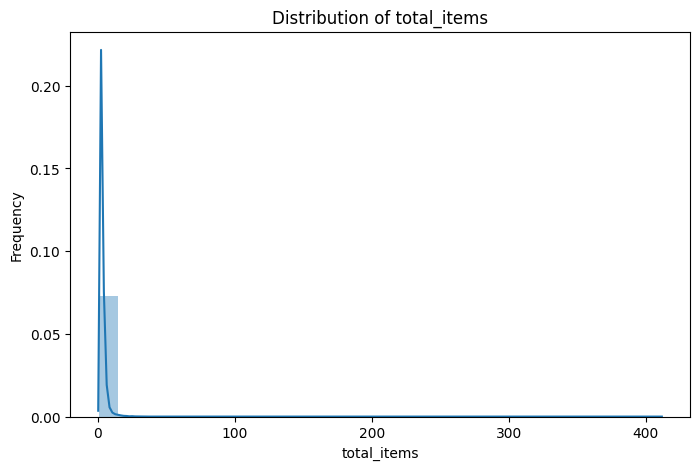

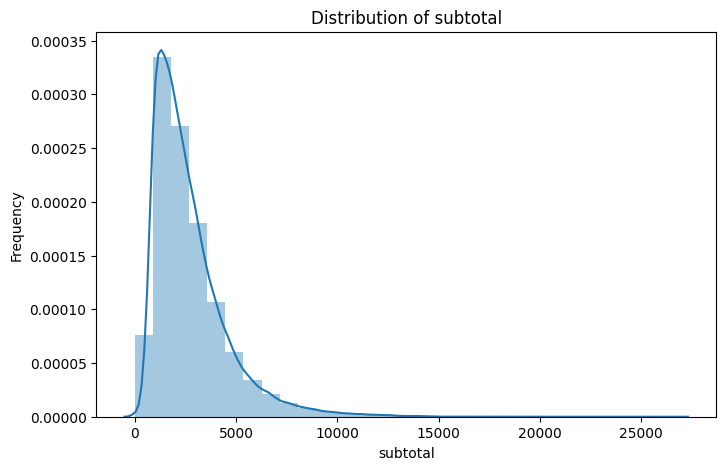

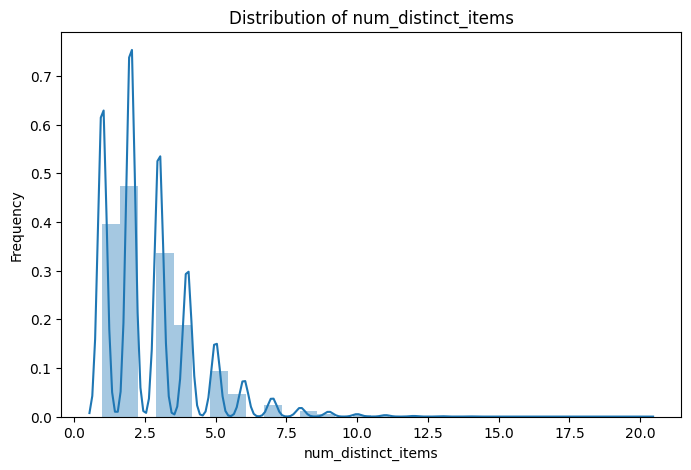

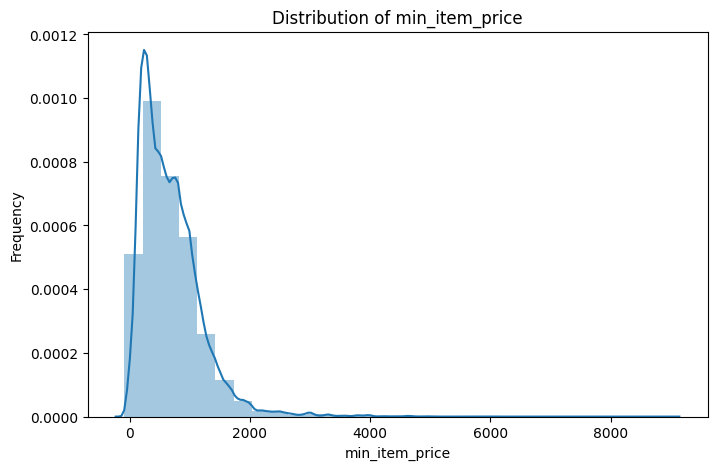

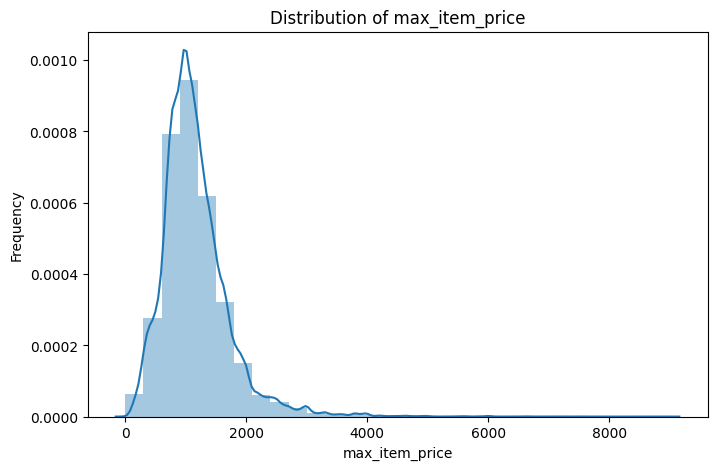

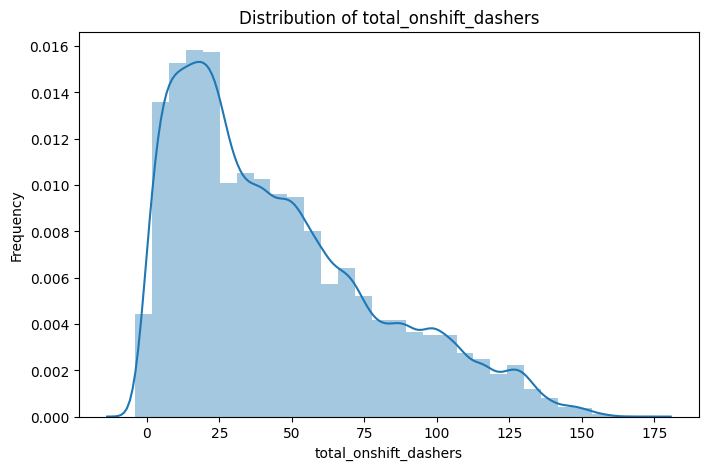

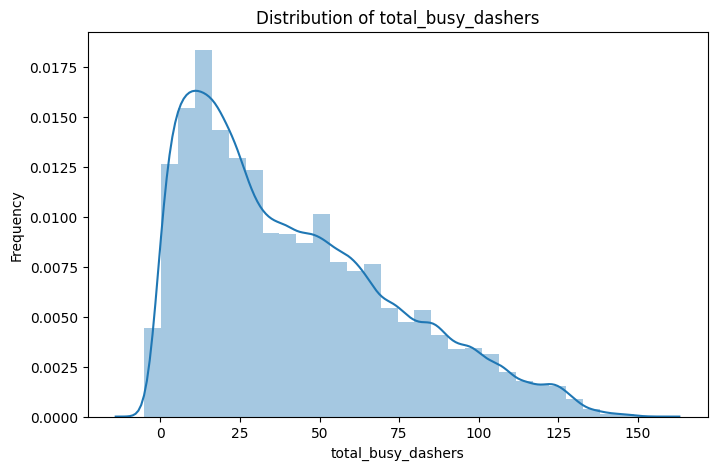

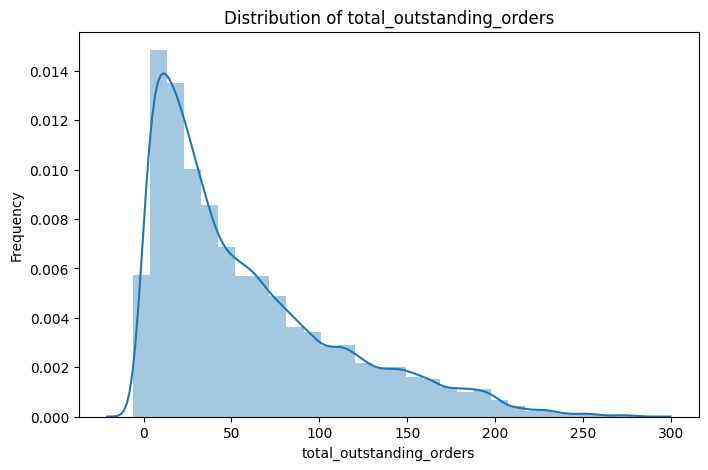

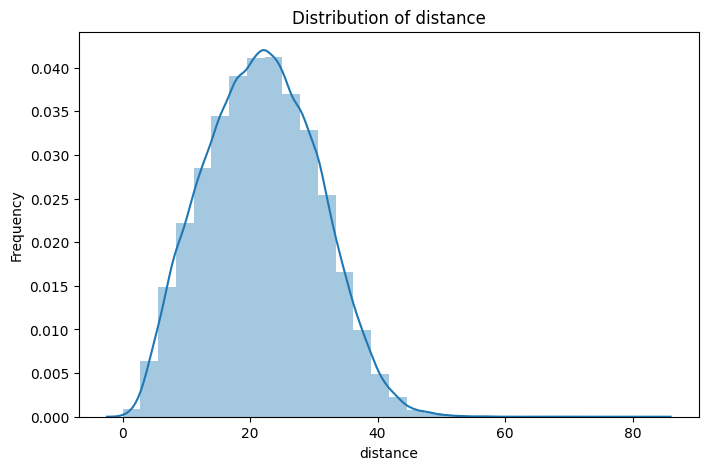

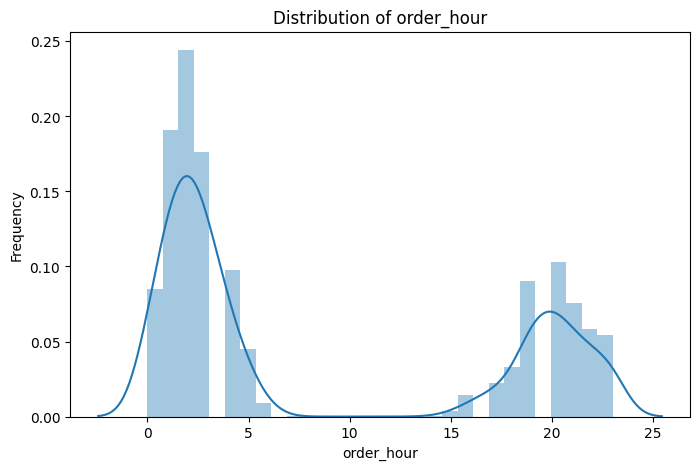

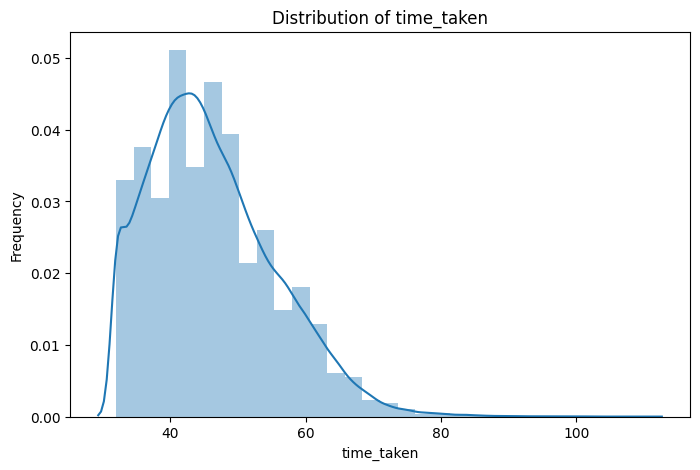

In [15]:
# Plot distributions for all numerical columns
for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.distplot(df_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

<Axes: xlabel='store_primary_category', ylabel='time_taken'>

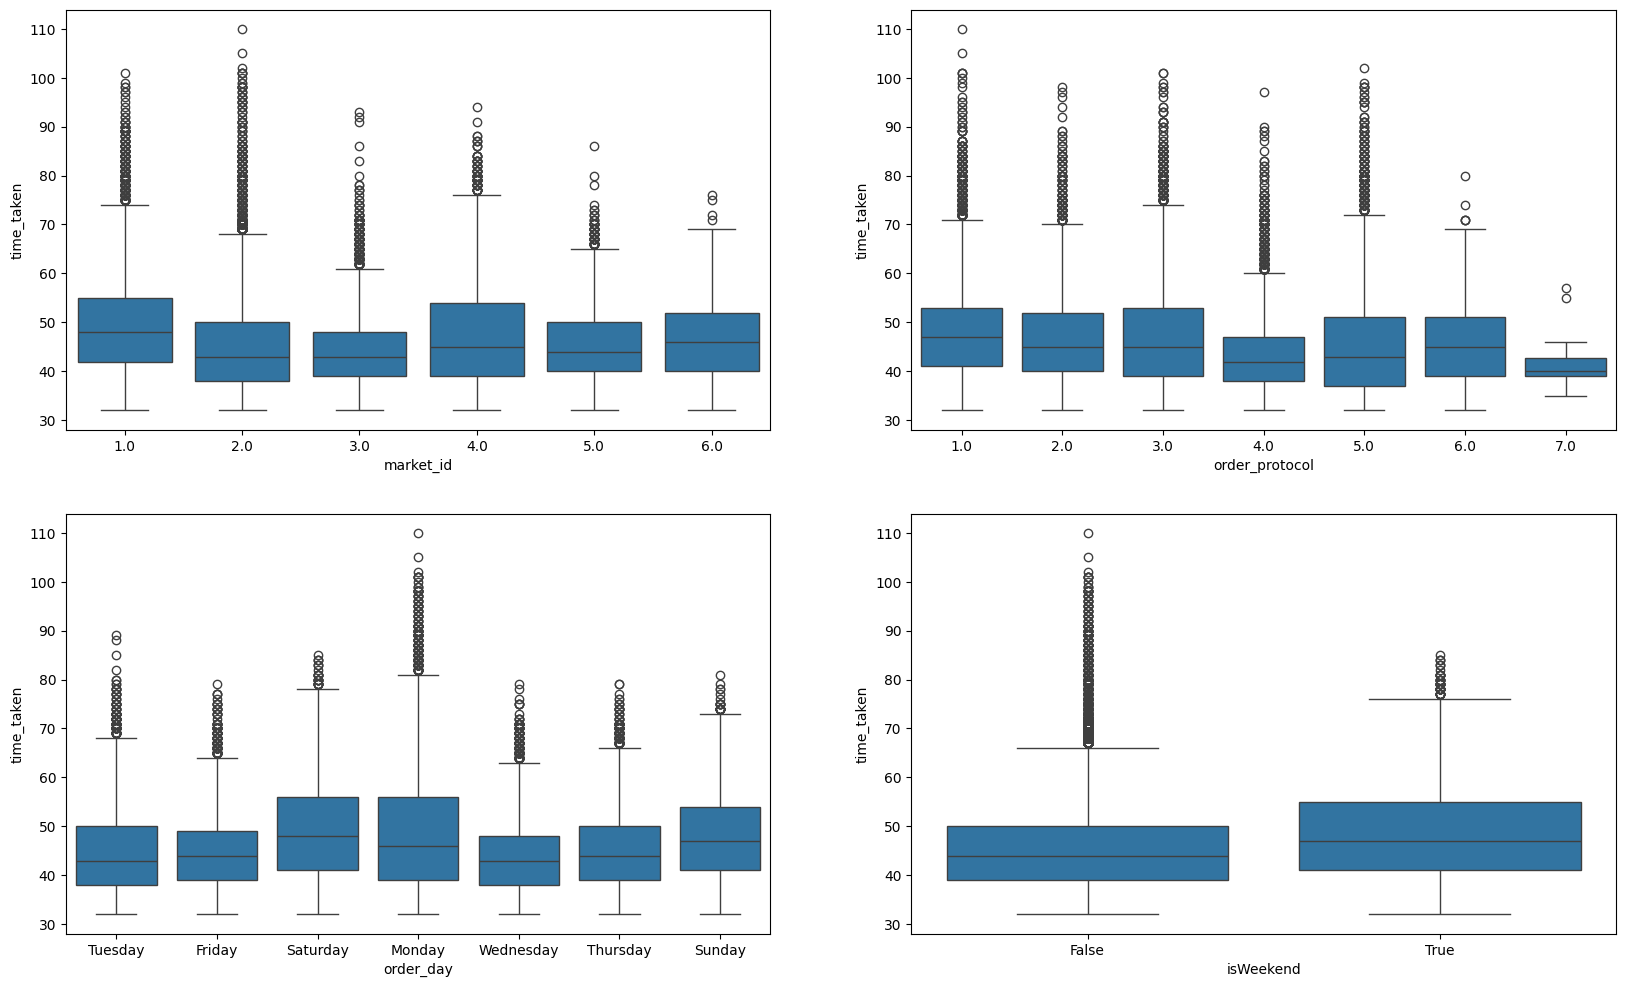

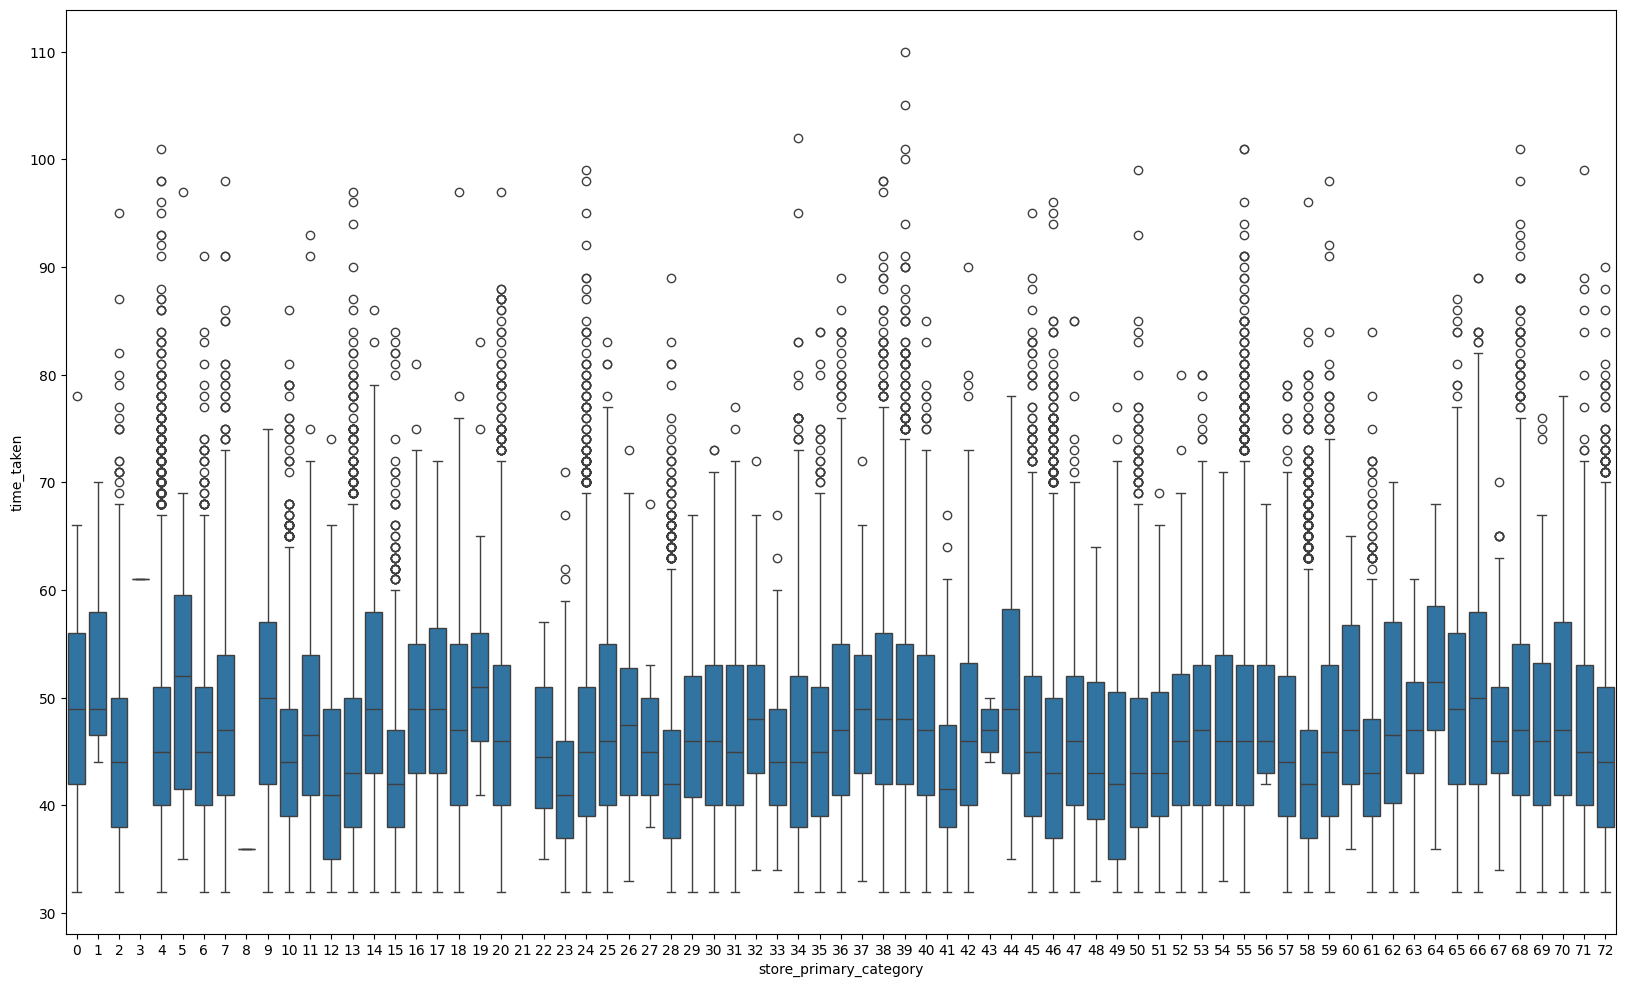

In [16]:
# Distribution of categorical columns
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'market_id', y = 'time_taken', data = df_train)
plt.subplot(2,2,2)
sns.boxplot(x = 'order_protocol', y = 'time_taken', data = df_train)
plt.subplot(2,2,3)
sns.boxplot(x = 'order_day', y = 'time_taken', data = df_train)
plt.subplot(2,2,4)
sns.boxplot(x = 'isWeekend', y = 'time_taken', data = df_train)

plt.figure(figsize=(20,12))
sns.boxplot(data=df_train, x='store_primary_category', y='time_taken')

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

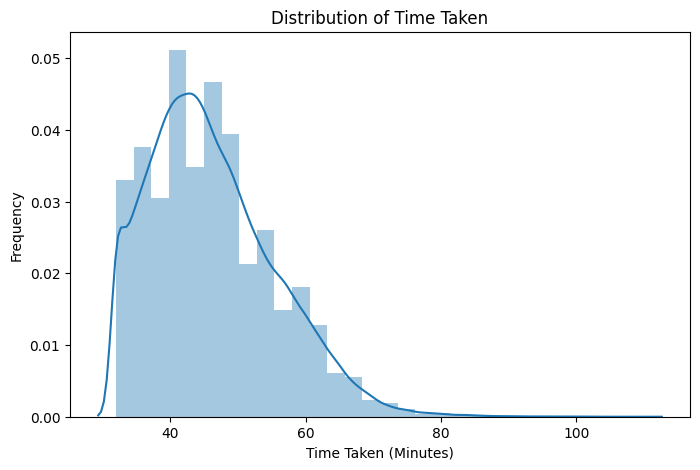

In [17]:
# Distribution of time_taken
plt.figure(figsize=(8,5))
sns.distplot(df_train['time_taken'], bins=30, kde=True)
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken (Minutes)')
plt.ylabel('Frequency')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

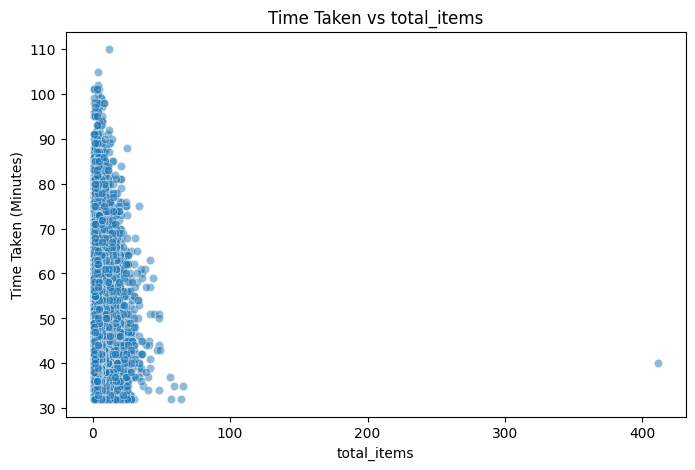

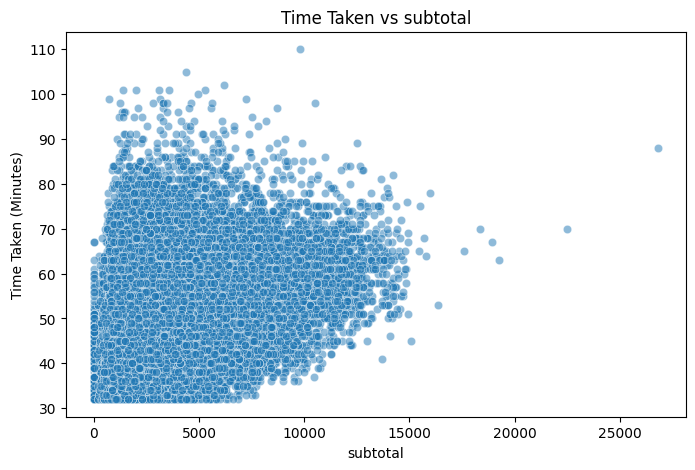

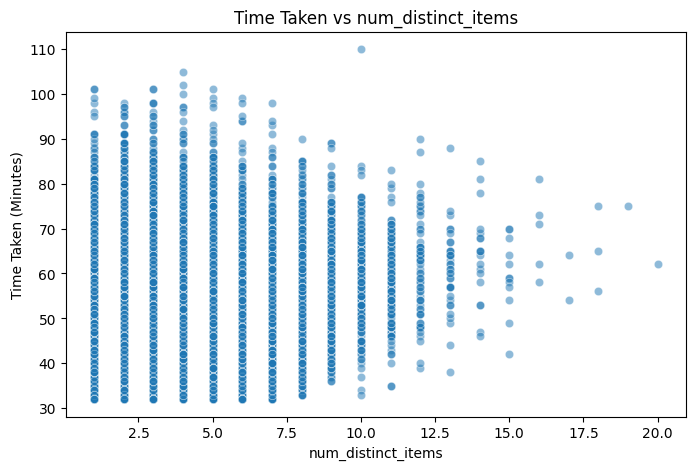

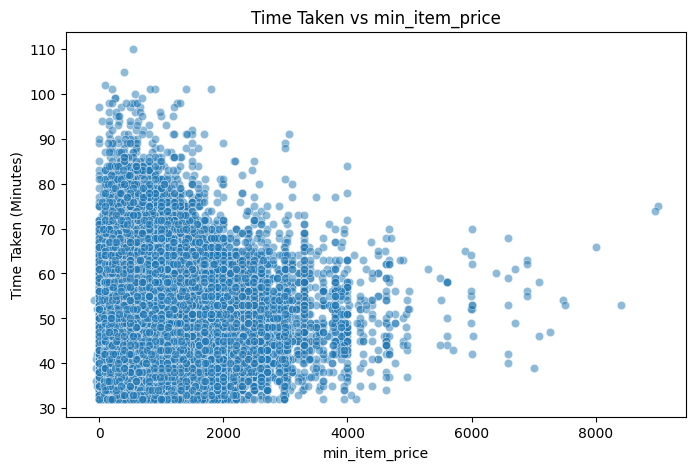

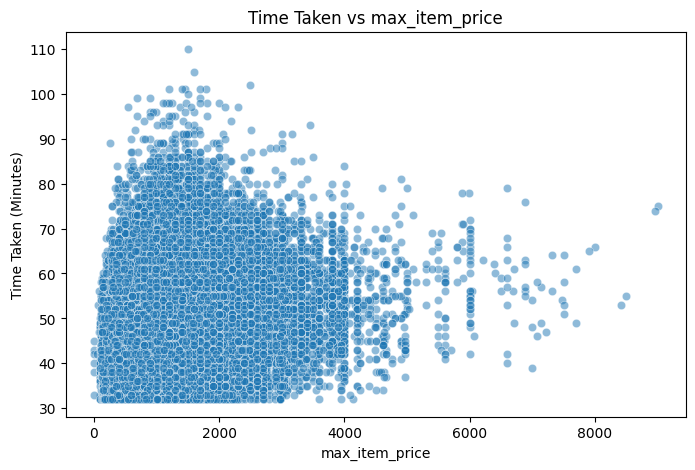

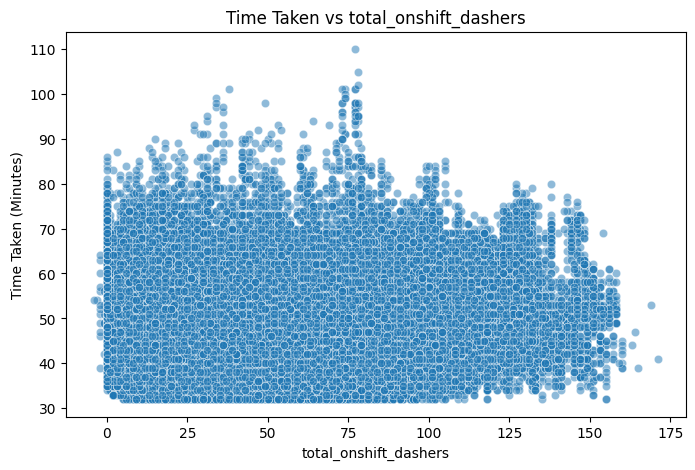

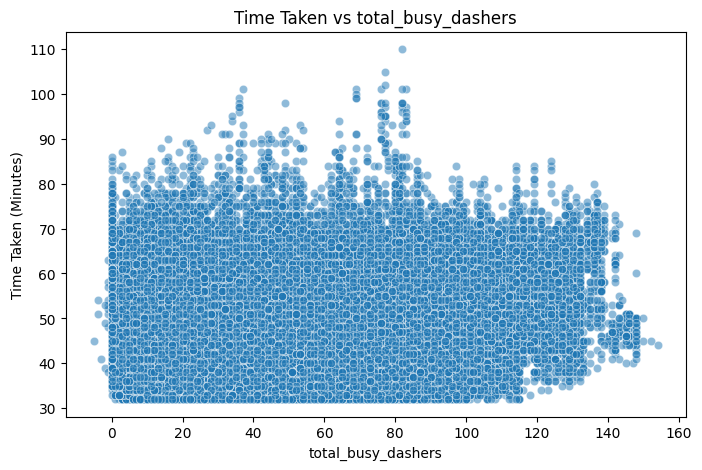

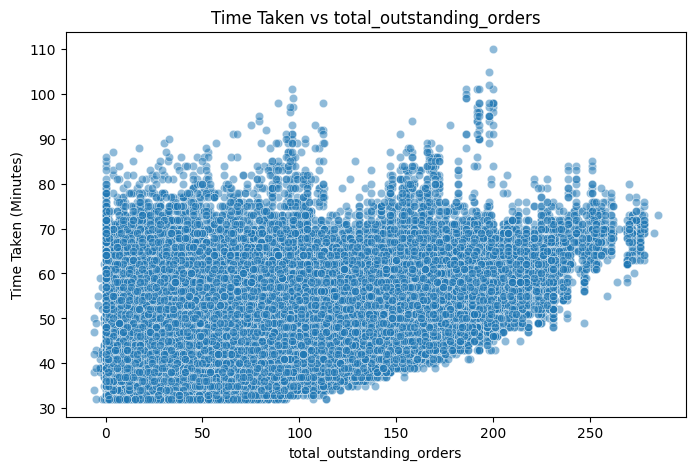

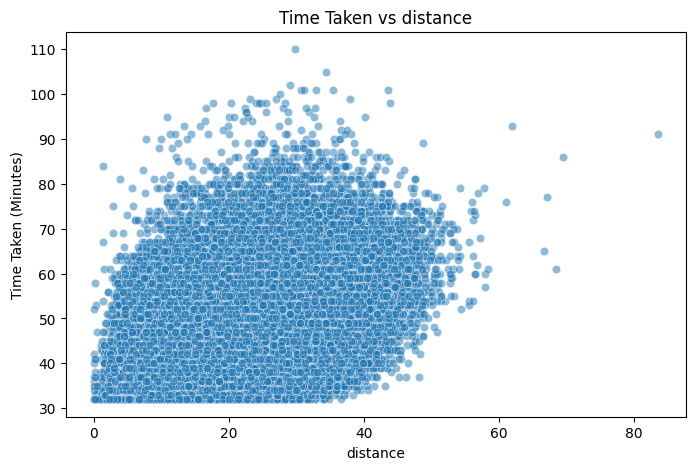

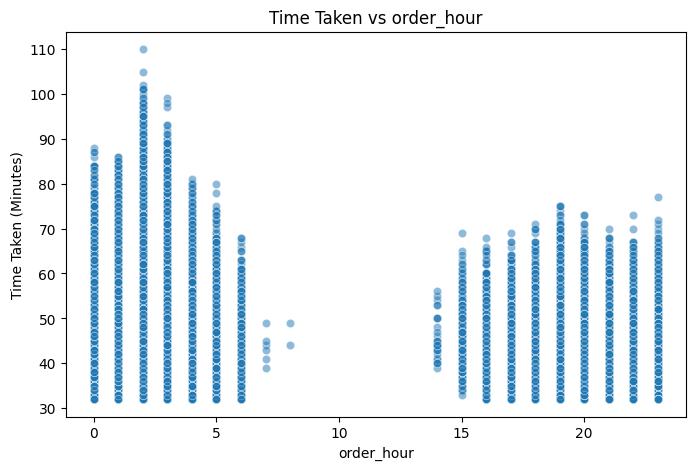

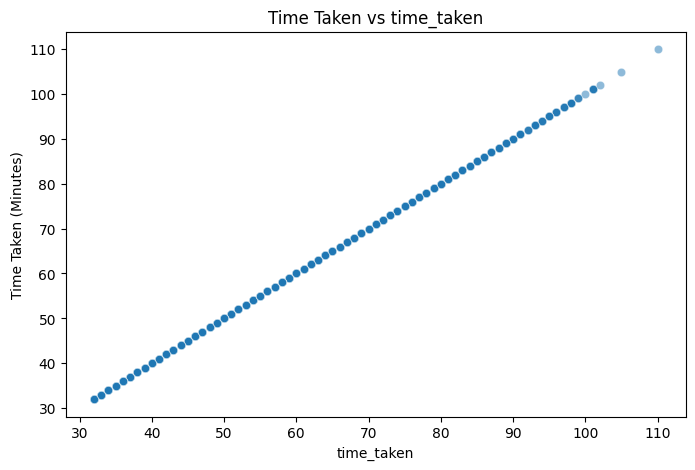

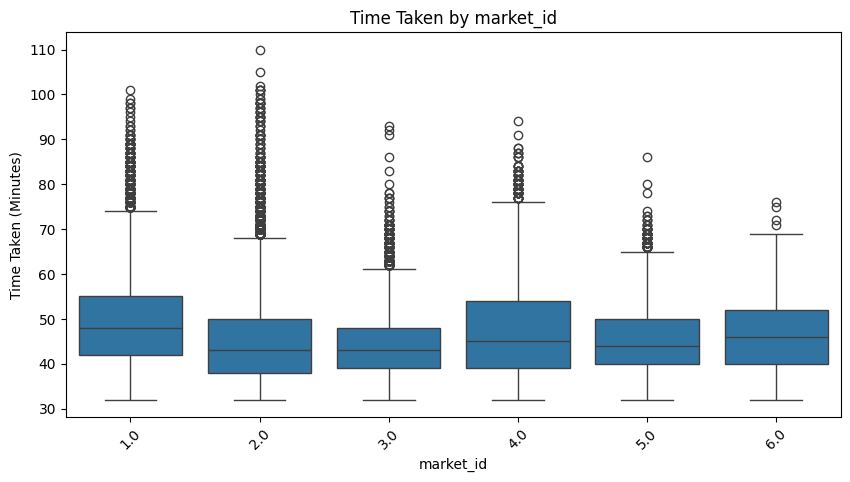

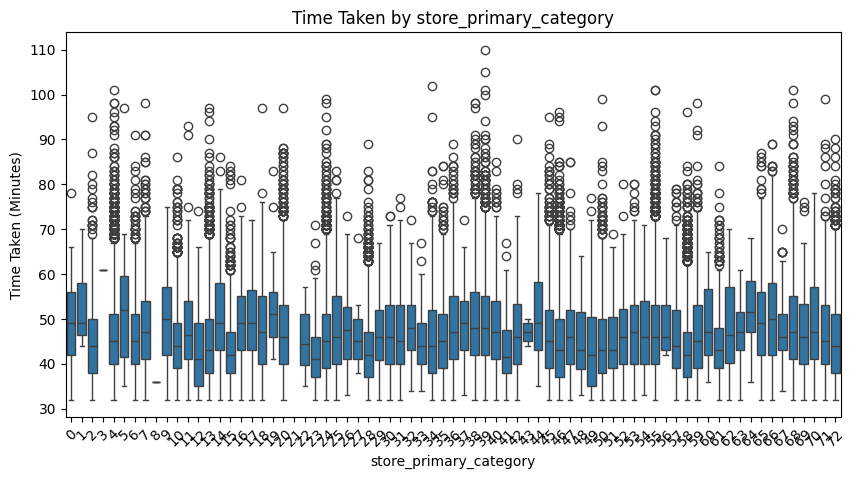

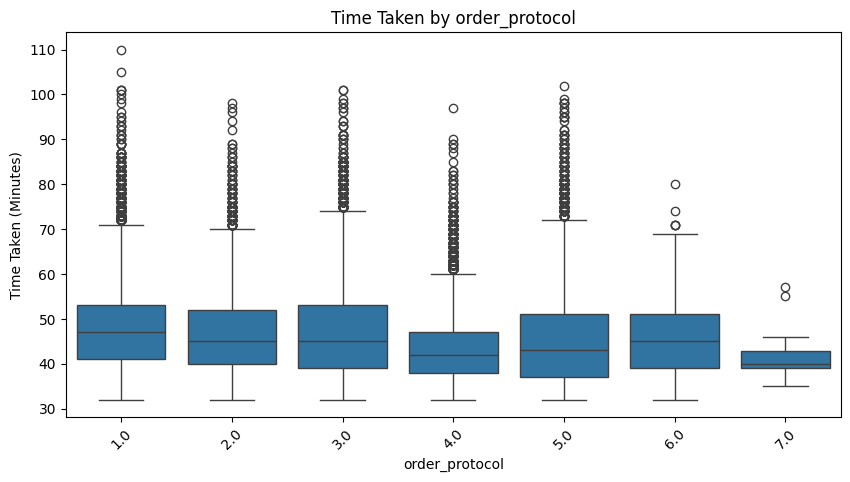

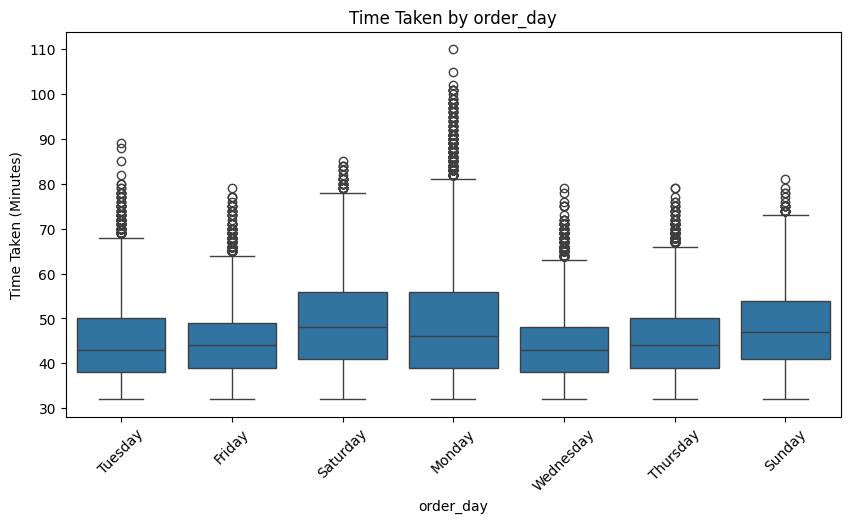

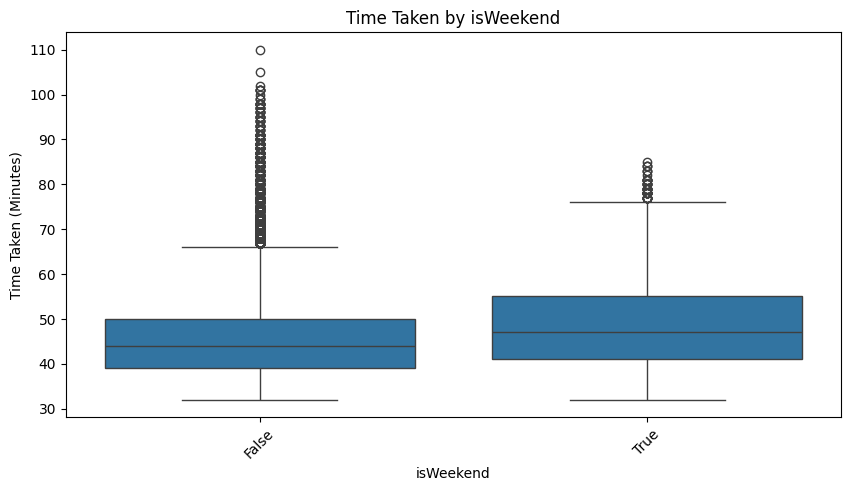

In [18]:
# Scatter plot to visualise the relationship between time_taken and other features

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=col, y='time_taken', data=df_train, alpha=0.5)
    plt.title(f'Time Taken vs {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken (Minutes)')
    plt.show()


for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y='time_taken', data=df_train)
    plt.title(f'Time Taken by {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken (Minutes)')
    plt.xticks(rotation=45)
    plt.show()

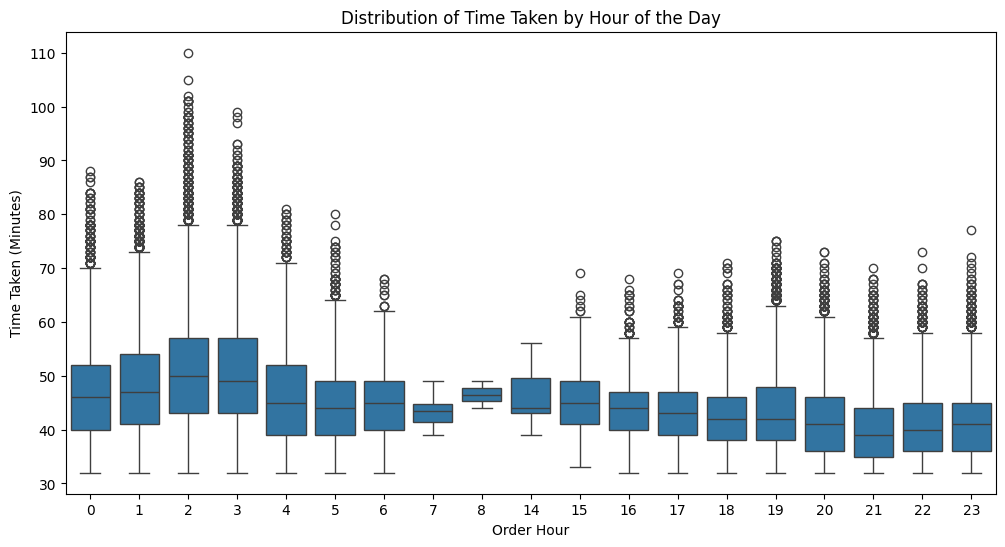

In [19]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12,6))
sns.boxplot(x='order_hour', y='time_taken', data=df_train)
plt.title('Distribution of Time Taken by Hour of the Day')
plt.xlabel('Order Hour')
plt.ylabel('Time Taken (Minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

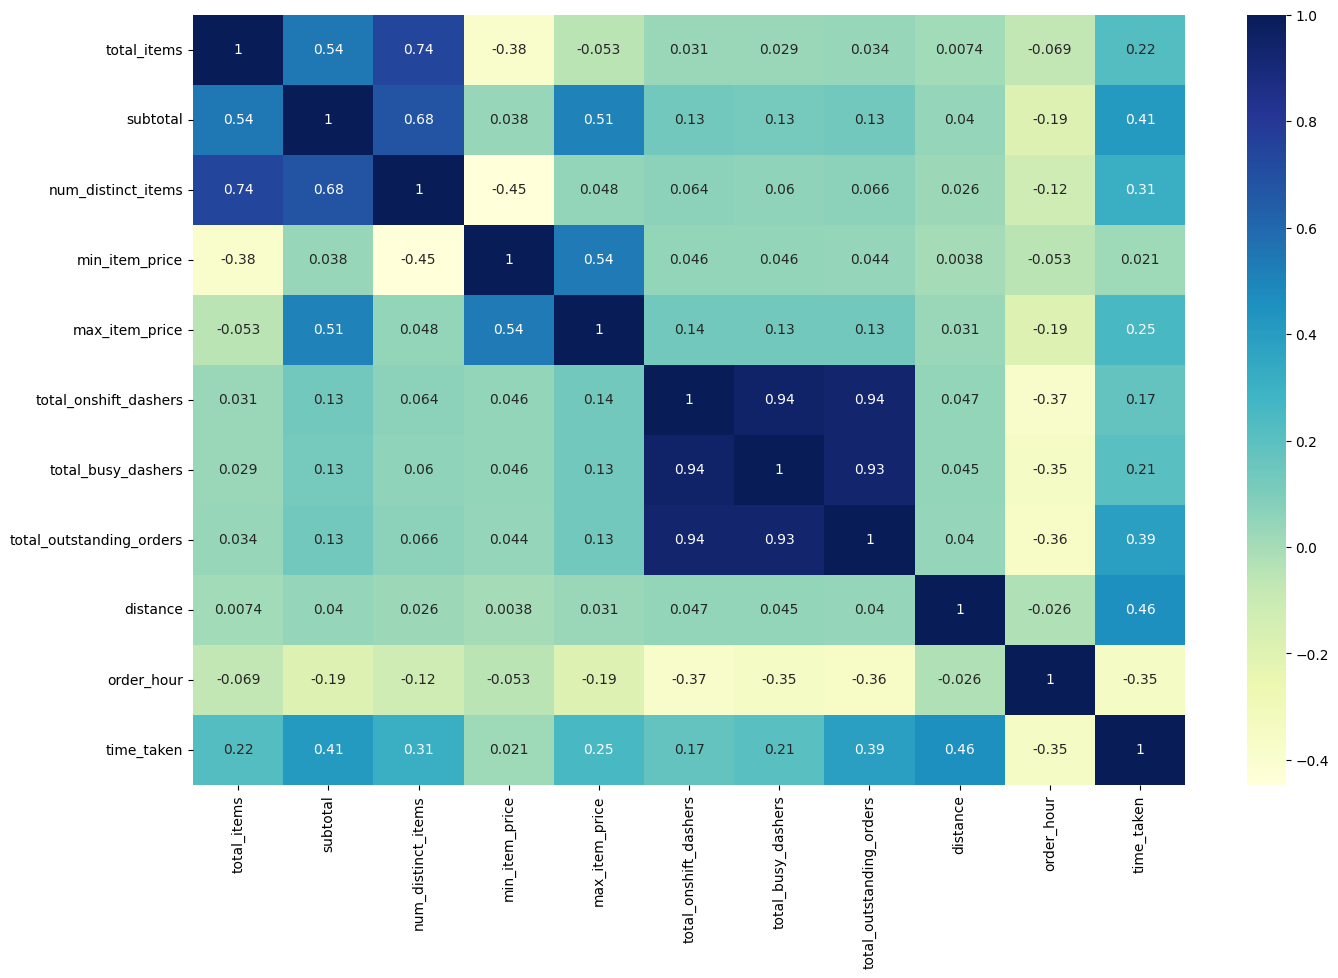

In [21]:
# Plot the heatmap of the correlation matrix
corr_matrix = df_train[num_cols].corr()
plt.figure(figsize = (16, 10))
sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [22]:
# Drop 3-5 weakly correlated columns from training dataset

weak_corr_cols = ['min_item_price', 'total_onshift_dashers', 'total_busy_dashers']
df_train = df_train.drop(columns = weak_corr_cols)

In [24]:
df_test = df_test.drop(columns=weak_corr_cols)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

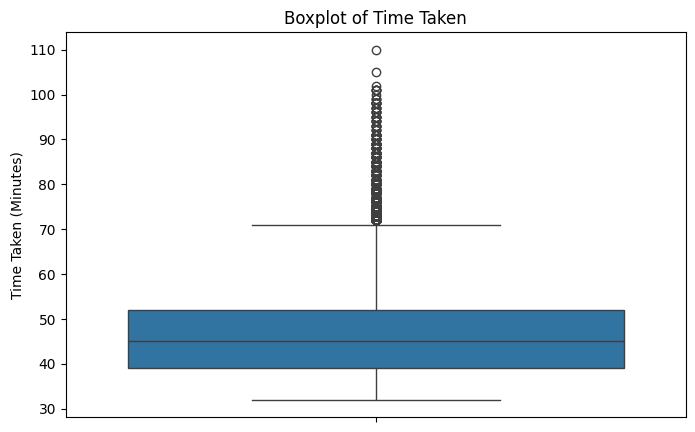

In [23]:
# Boxplot for time_taken

plt.figure(figsize=(8,5))
sns.boxplot(y=df_train['time_taken'])
plt.title('Boxplot of Time Taken')
plt.ylabel('Time Taken (Minutes)')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [25]:
# Handle outliers
num_cols_to_fix = [
    'time_taken',
    'distance',
    'subtotal',
    'num_distinct_items',
    'total_outstanding_orders',
    'order_hour',
    'max_item_price',
    'total_items'
]
def handle_outliers_iqr(train_df, test_df, cols):
    for col in cols:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        train_df[col] = train_df[col].clip(lower=lower_bound, upper=upper_bound)
        test_df[col] = test_df[col].clip(lower=lower_bound, upper=upper_bound)


    return train_df, test_df
df_train, df_test = handle_outliers_iqr(df_train, df_test, num_cols_to_fix)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [27]:
# Define numerical and categorical columns for easy EDA and data manipulation

num_cols = [
    'distance',
    'subtotal',
    'num_distinct_items',
    'total_outstanding_orders',
    'order_hour',
    'max_item_price',
    'total_items',
    'time_taken'  
]
cat_cols = [
    'market_id',
    'order_day',
    'store_primary_category',
    'isWeekend'
]

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

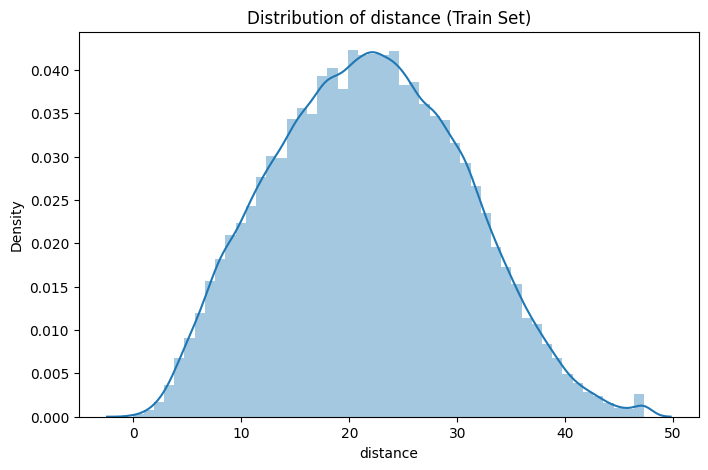

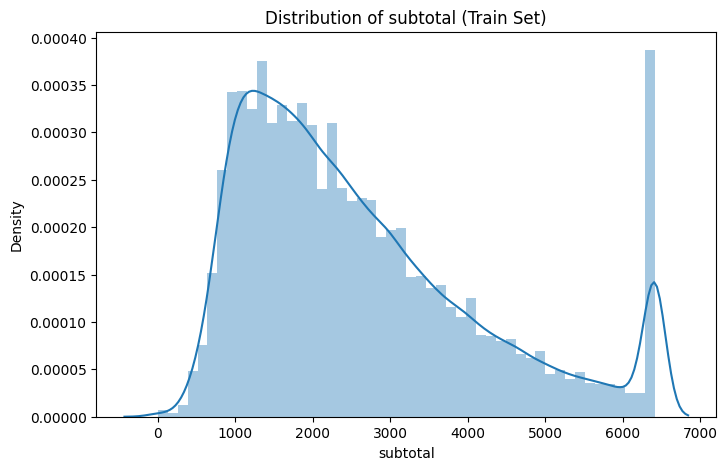

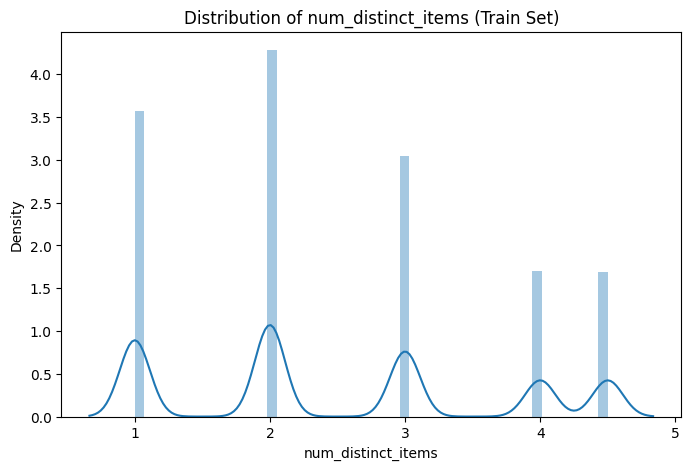

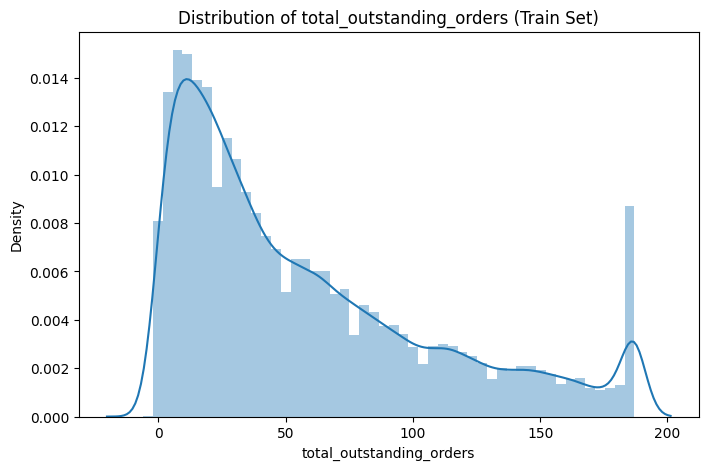

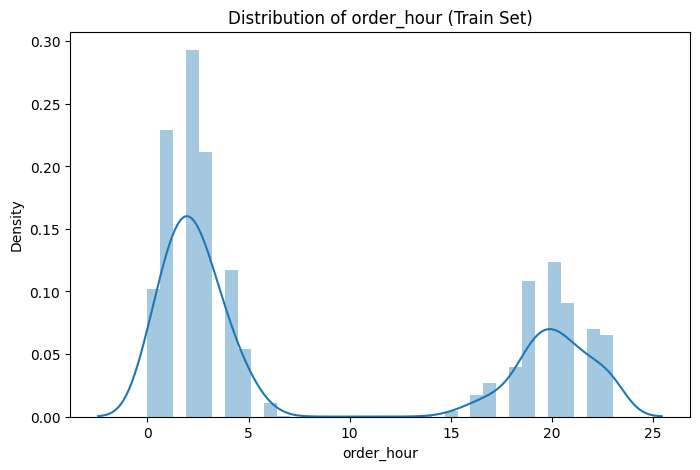

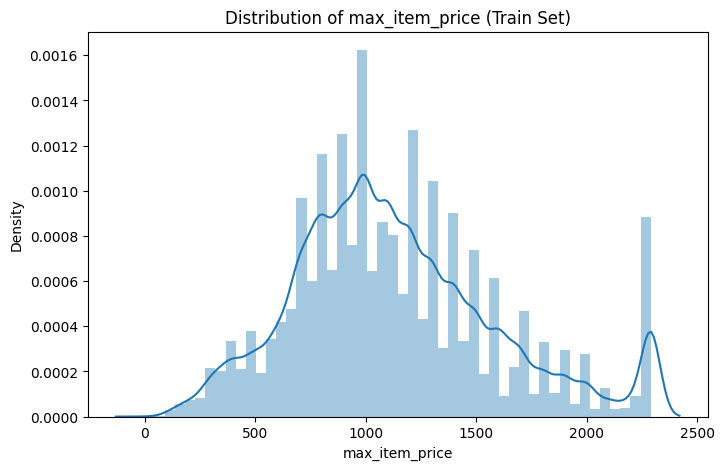

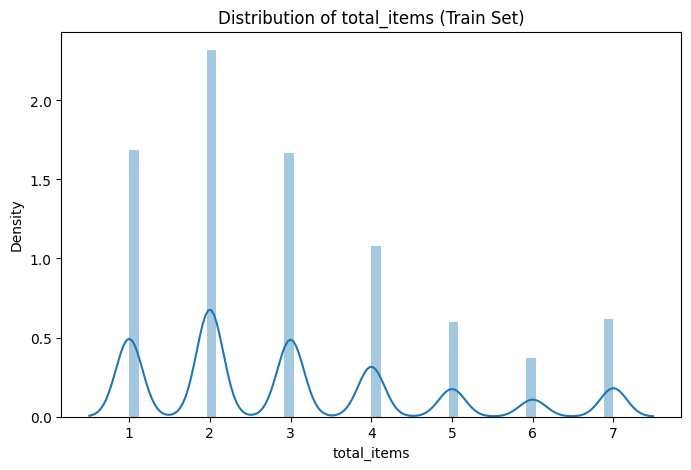

In [29]:
# Plot distributions for all numerical columns
for col in num_cols:
    if col != 'time_taken':
        plt.figure(figsize=(8,5))
        sns.distplot(df_train[col], kde=True)
        plt.title(f'Distribution of {col} (Train Set)')
        plt.show()


##### **4.1.2**
Check the distribution of categorical features

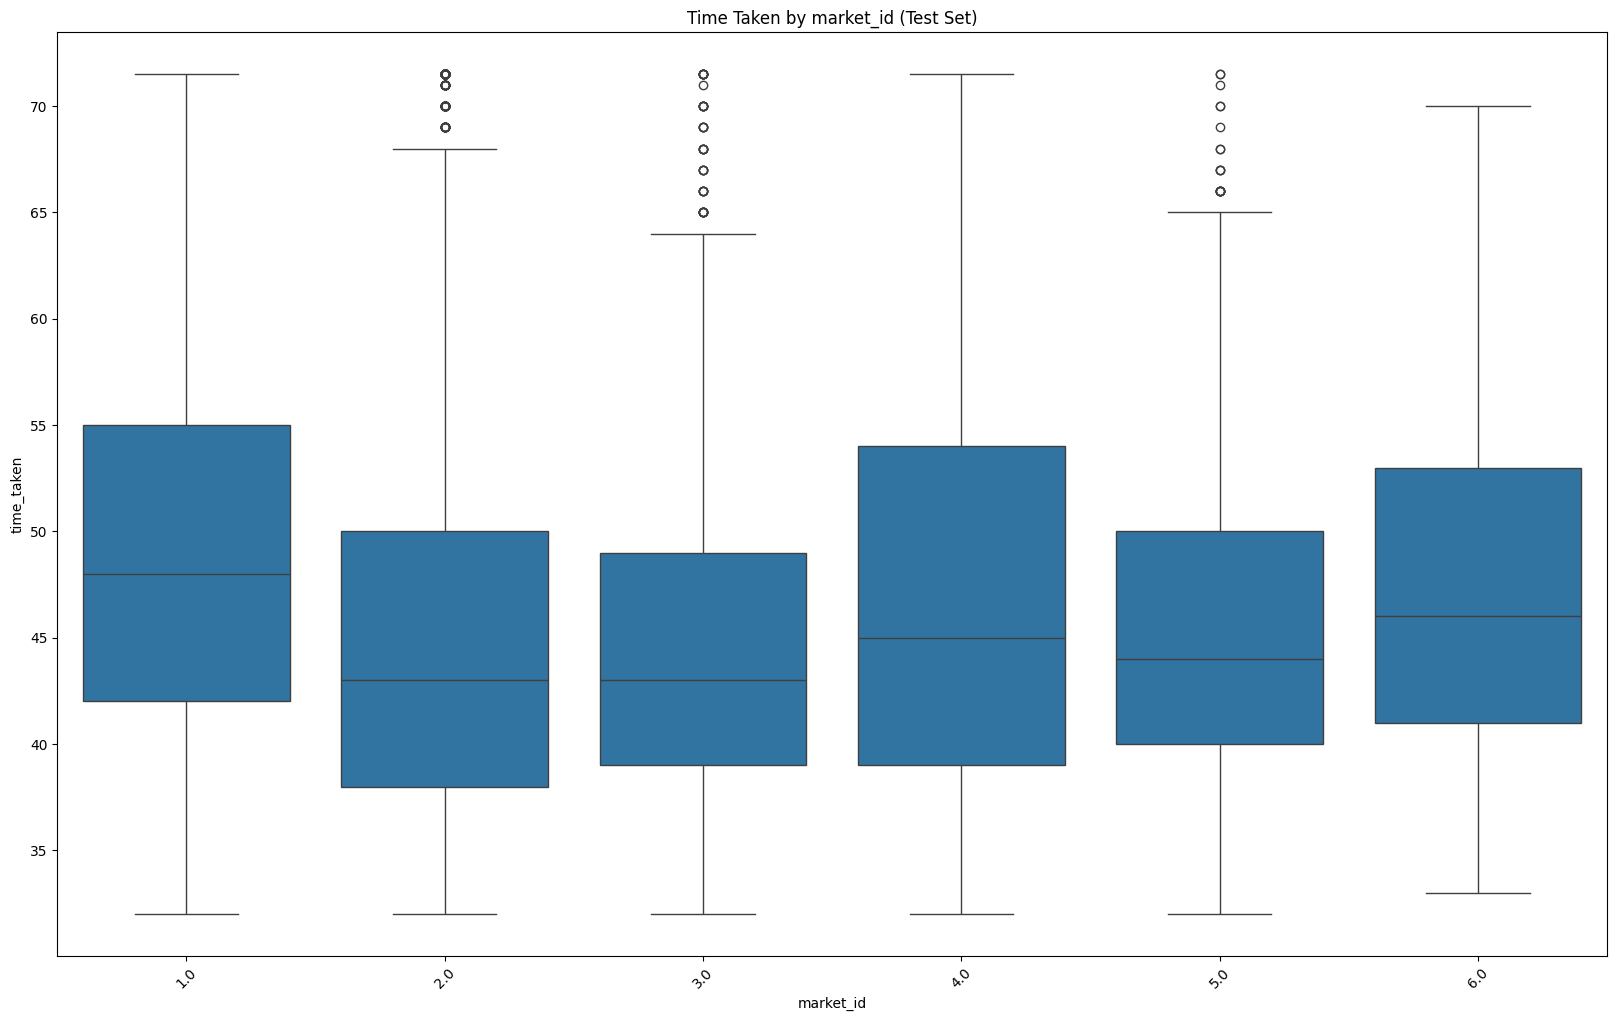

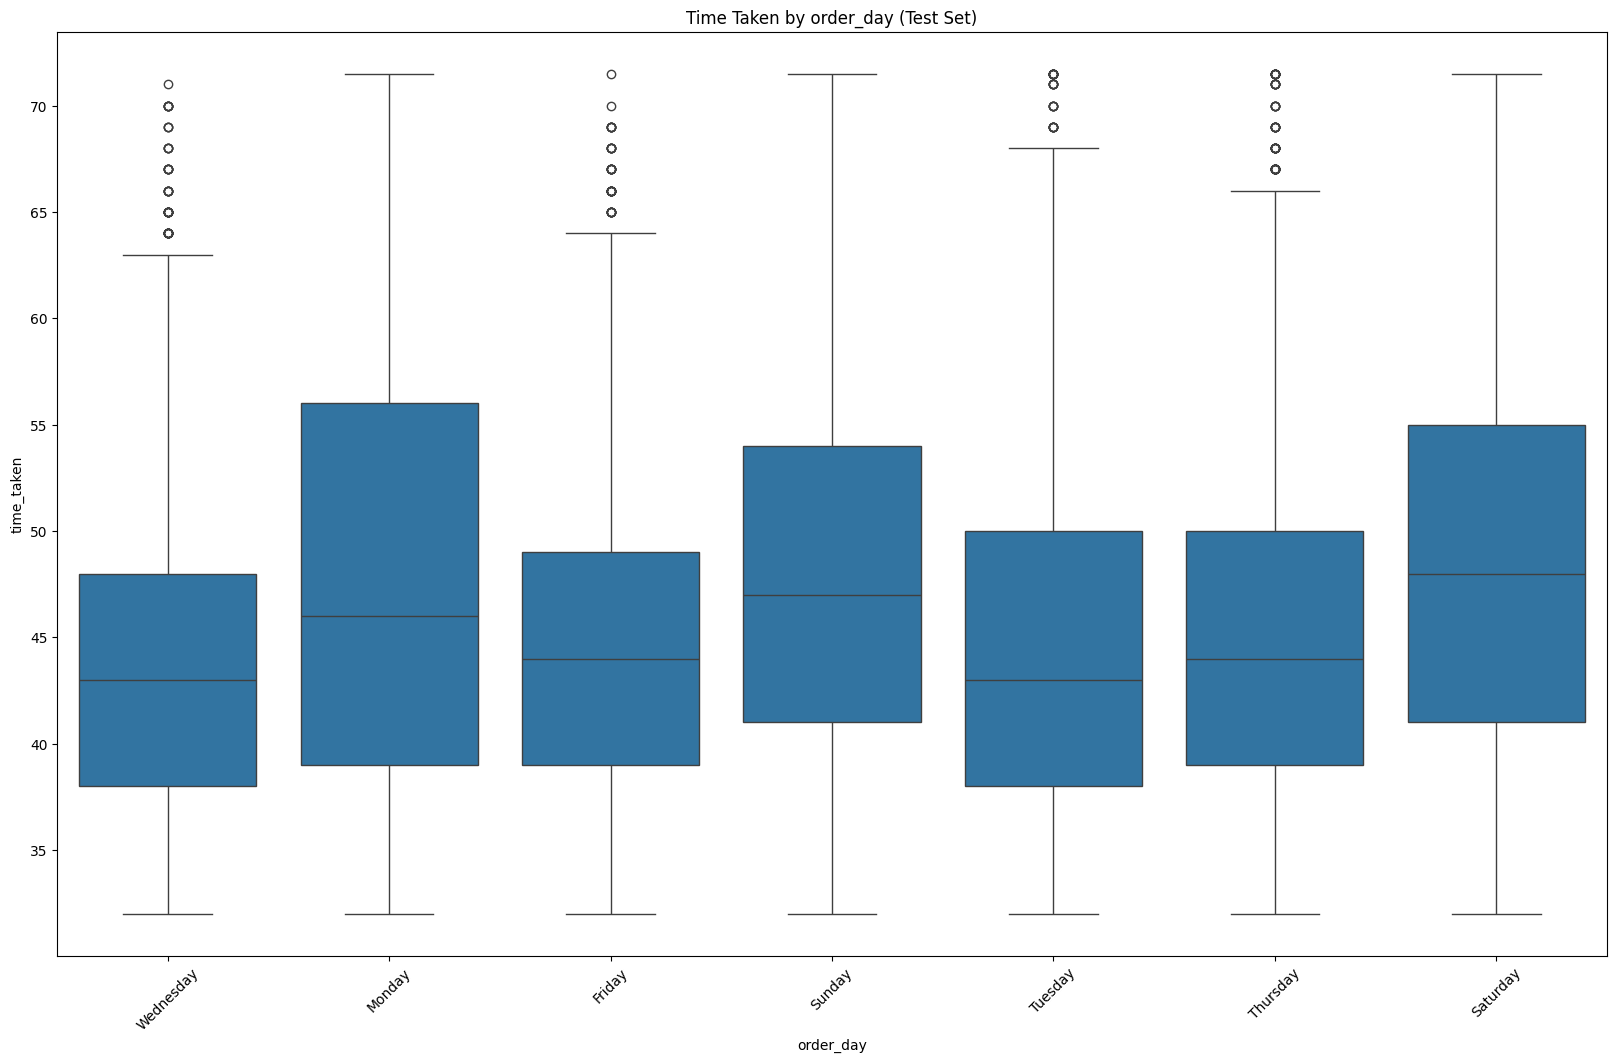

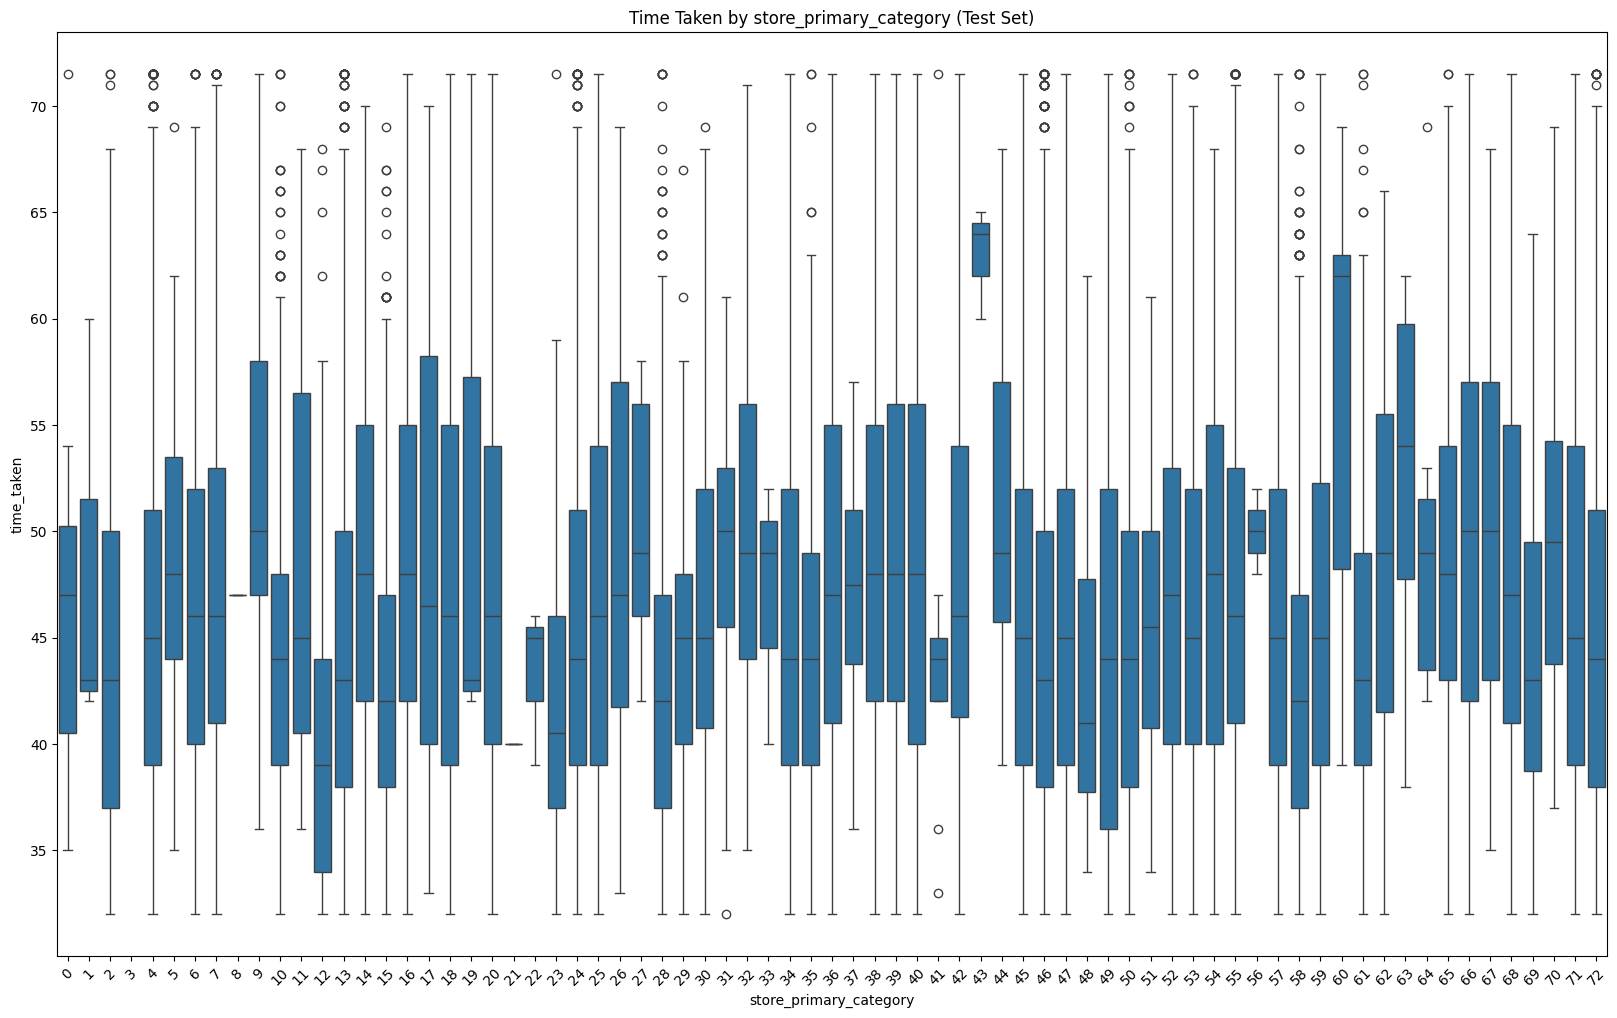

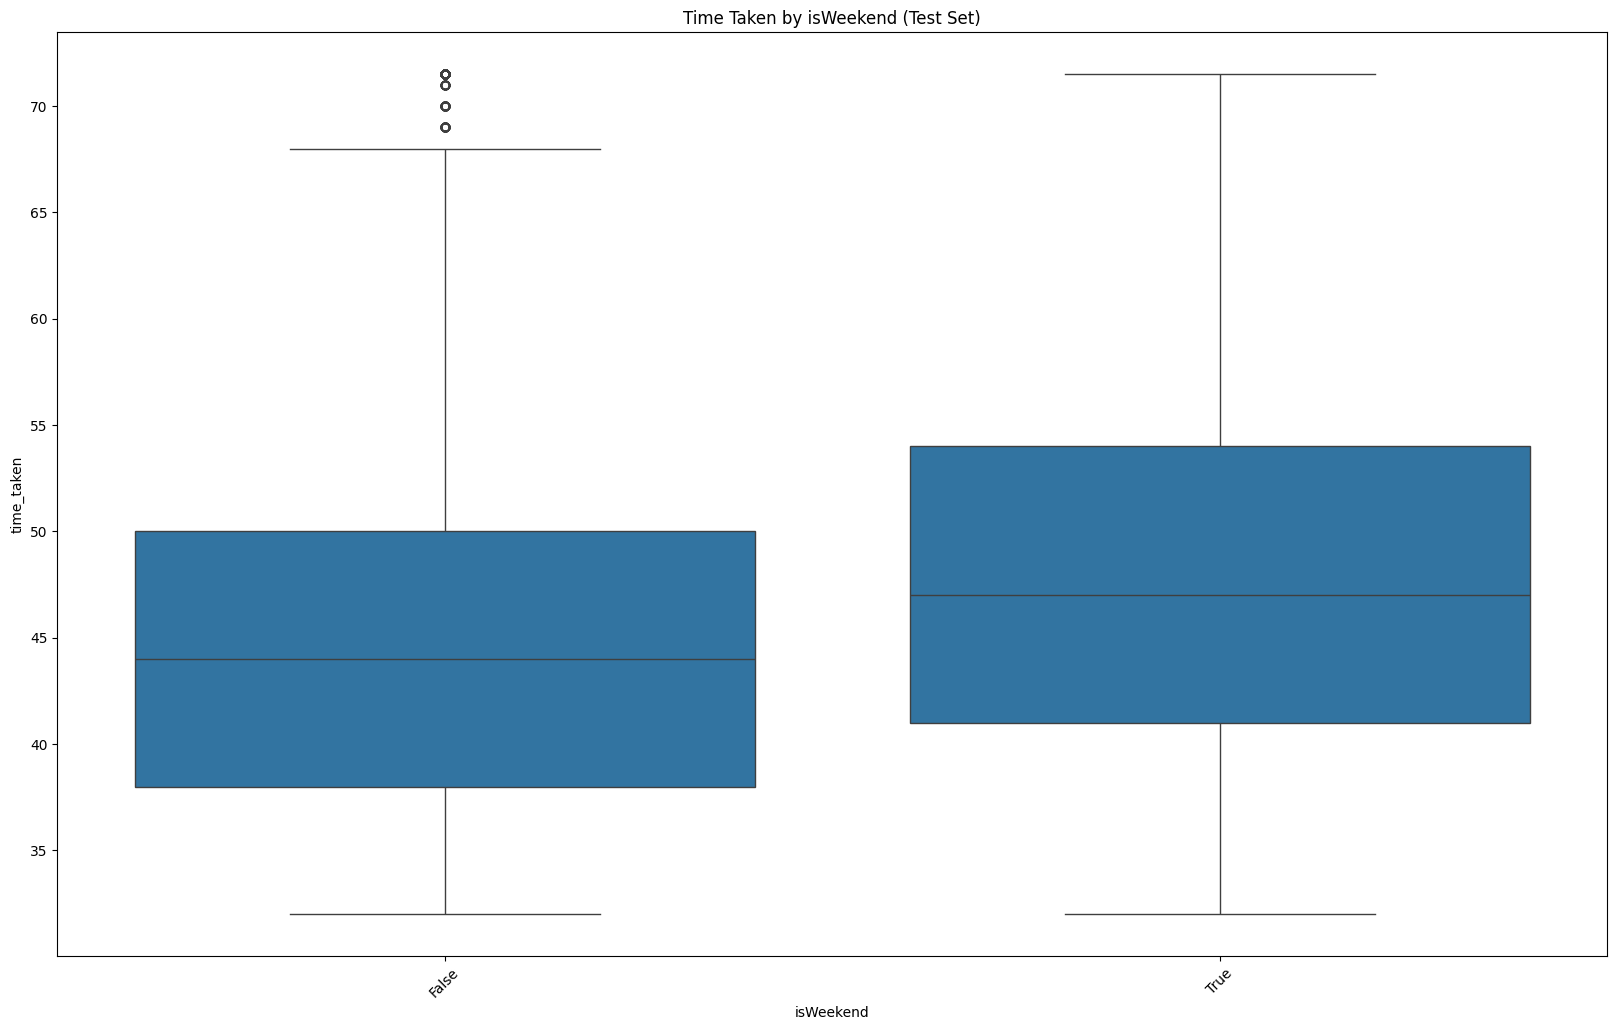

In [32]:
# Distribution of categorical columns

for col in cat_cols:
    plt.figure(figsize=(20,12))
    sns.boxplot(x=col, y='time_taken', data=df_test)
    plt.title(f'Time Taken by {col} (Test Set)')
    plt.xticks(rotation=45)
    plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

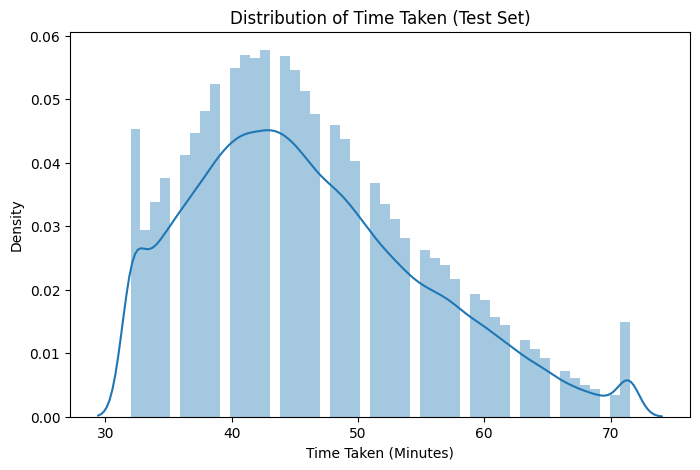

In [36]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.distplot(df_train['time_taken'], kde=True)
plt.title('Distribution of Time Taken (Test Set)')
plt.xlabel('Time Taken (Minutes)')
plt.show()



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

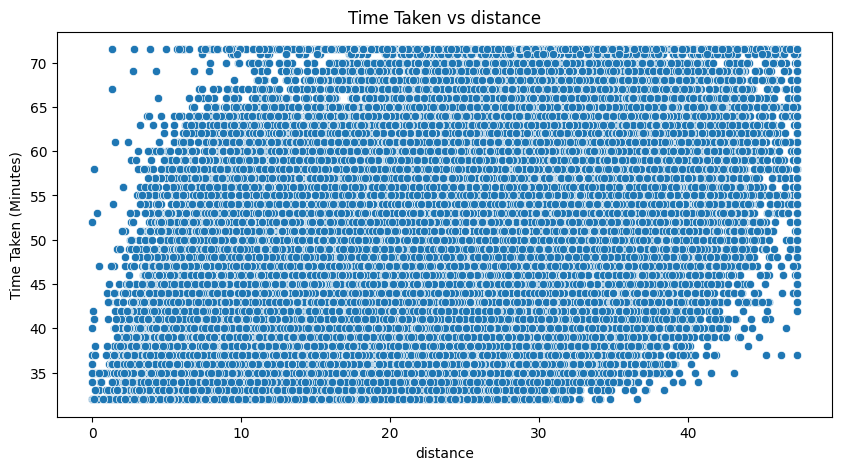

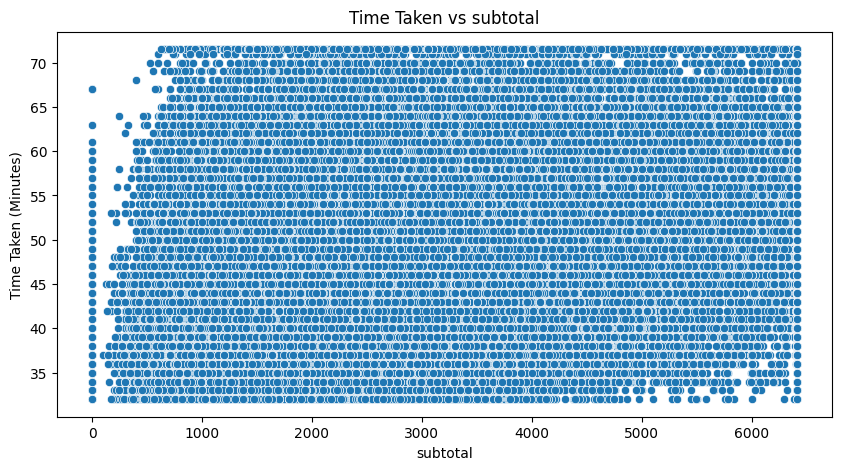

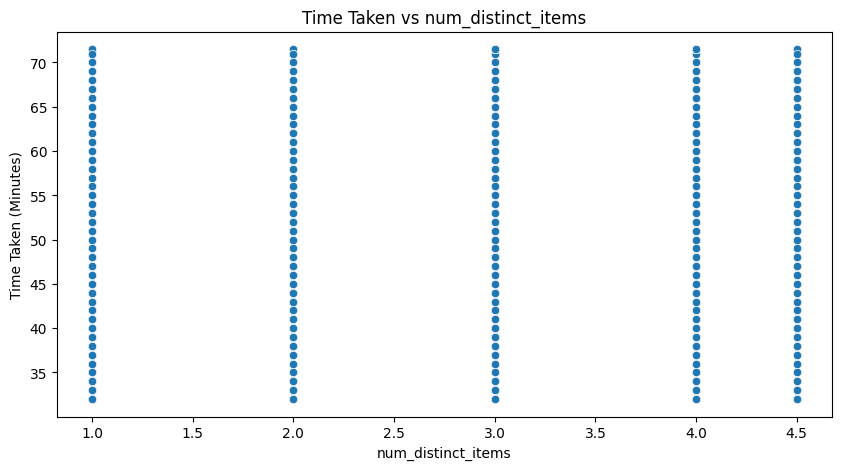

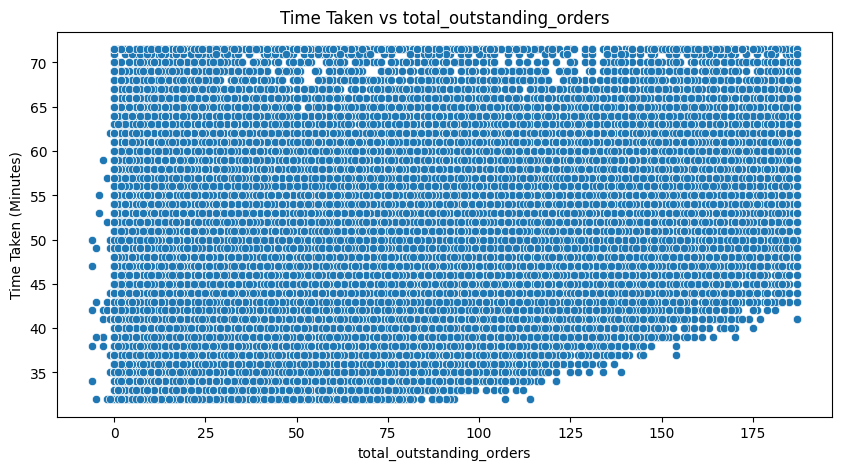

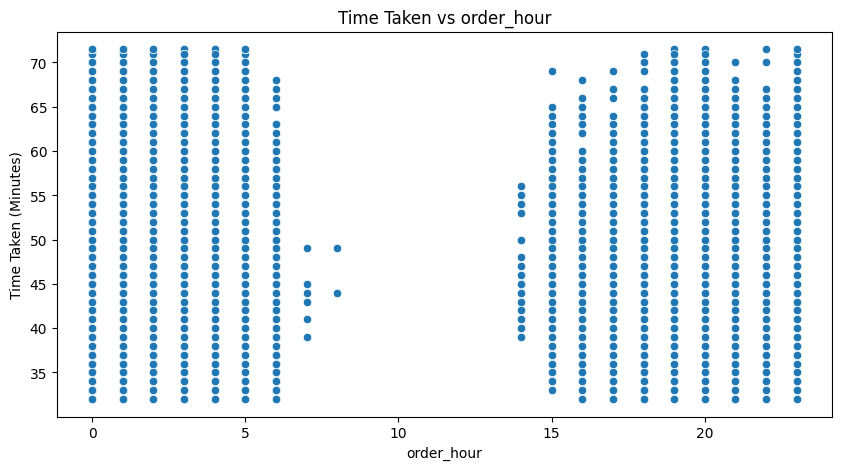

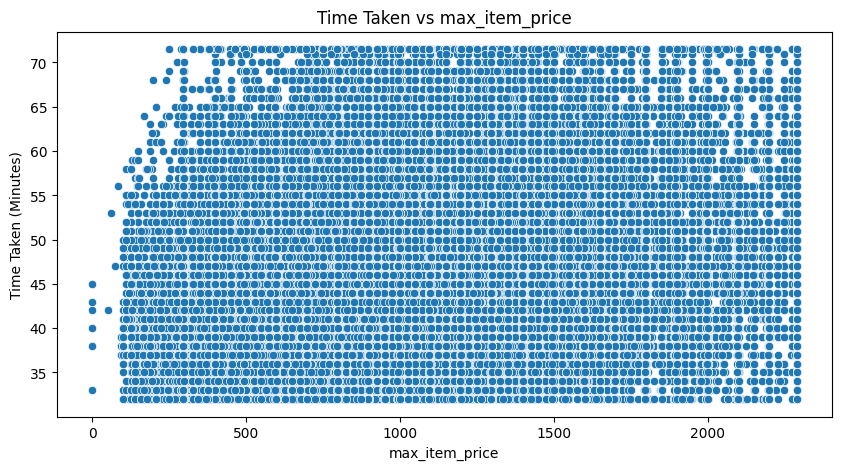

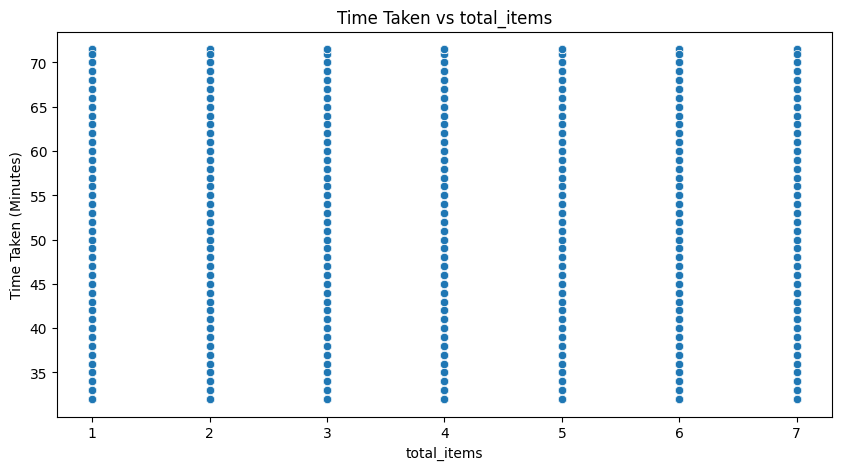

In [38]:
# Scatter plot to visualise the relationship between time_taken and other features

for col in num_cols:
    if col != 'time_taken':
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=col, y='time_taken', data=df_train)
        plt.title(f'Time Taken vs {col}')
        plt.xlabel(col)
        plt.ylabel('Time Taken (Minutes)')
        plt.show()
        

#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [39]:
# Import libraries
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = df_train.drop(columns=['time_taken'])
y_train = df_train['time_taken']

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [40]:
# Apply scaling to the numerical columns
num_vars = ['distance',
    'subtotal',
    'num_distinct_items',
    'total_outstanding_orders',
    'order_hour',
    'max_item_price',
    'total_items']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
102712       2.0                     45            2.0     0.000000  0.127915   
94576        4.0                     20            3.0     0.000000  0.155214   
49784        1.0                     36            3.0     0.500000  0.318228   
37753        3.0                     39            1.0     0.166667  0.370642   
91728        2.0                      6            1.0     0.000000  0.223072   

        num_distinct_items  max_item_price  total_outstanding_orders  \
102712            0.000000        0.325470                  0.321244   
94576             0.000000        0.434688                  0.632124   
49784             0.857143        0.391000                  0.067358   
37753             0.285714        0.611184                  0.129534   
91728             0.000000        0.576671                  0.300518   

        distance  time_taken  order_hour order_day  isWeekend  
102712  0.640744        45.0    0.913043   Tuesday      False  
94576   0.658495        43.0    0.086957    Friday      False  
49784   0.383770        46.0    0.913043    Friday      False  
37753   0.706678        51.0    0.130435   Tuesday      False  
91728   0.666948        37.0    0.913043    Friday      False

In [51]:
# X_train['isWeekend'] = X_train['isWeekend'].astype(int)
# categorical_cols = [
#     'market_id',
#     'store_primary_category',
#     'order_protocol',
#     'order_day'
# ]
# X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
bool_cols = X_train.select_dtypes(include='bool').columns
X_train[bool_cols] = X_train[bool_cols].astype(int)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [52]:
# Create/Initialise the model
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [53]:
print(X_train.dtypes)

total_items                   int64
subtotal                    float64
num_distinct_items          float64
max_item_price                int64
total_outstanding_orders    float64
                             ...   
order_day_Saturday            int64
order_day_Sunday              int64
order_day_Thursday            int64
order_day_Tuesday             int64
order_day_Wednesday           int64
Length: 97, dtype: object


In [54]:
# Train the model using the training data
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     2602.
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:58:47   Log-Likelihood:            -4.3906e+05
No. Observations:              140621   AIC:                         8.783e+05
Df Residuals:                  140525   BIC:                         8.793e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [61]:
# Make predictions
num_vars = ['distance',
    'subtotal',
    'num_distinct_items',
    'total_outstanding_orders',
    'order_hour',
    'max_item_price',
    'total_items']

df_test[num_vars] = scaler.transform(df_test[num_vars])

X_test = df_test.drop(columns=['time_taken'])
X_test['isWeekend'] = X_test['isWeekend'].astype(int)

X_test = pd.get_dummies(X_test, columns=['market_id', 'store_primary_category', 'order_protocol', 'order_day'], drop_first=True)
y_test = df_test['time_taken']
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
y_train_pred = lr.predict(X_train_sm)
X_test_sm = sm.add_constant(X_test)  
y_test_pred = lr.predict(X_test_sm)


In [62]:
# Find results for evaluation metrics

from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

-4.519598746476686

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [66]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)


# X_train_rfe = X_train[selected_columns]
# X_test_rfe = X_test[selected_columns]

# lm.fit(X_train_rfe, y_train)


# y_train_pred_rfe = lm.predict(X_train_rfe)
# y_test_pred_rfe = lm.predict(X_test_rfe)

# from sklearn.metrics import r2_score
# print("Train R²:", r2_score(y_train, y_train_pred_rfe))
# print("Test R² :", r2_score(y_test, y_test_pred_rfe))

In [67]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('total_items', np.False_, np.int64(40)),
 ('subtotal', np.False_, np.int64(76)),
 ('num_distinct_items', np.False_, np.int64(5)),
 ('max_item_price', np.False_, np.int64(77)),
 ('total_outstanding_orders', np.False_, np.int64(70)),
 ('distance', np.False_, np.int64(54)),
 ('order_hour', np.False_, np.int64(61)),
 ('isWeekend', np.True_, np.int64(1)),
 ('market_id_2.0', np.True_, np.int64(1)),
 ('market_id_3.0', np.True_, np.int64(1)),
 ('market_id_4.0', np.True_, np.int64(1)),
 ('market_id_5.0', np.True_, np.int64(1)),
 ('market_id_6.0', np.False_, np.int64(7)),
 ('store_primary_category_1', np.True_, np.int64(1)),
 ('store_primary_category_2', np.False_, np.int64(21)),
 ('store_primary_category_3', np.True_, np.int64(1)),
 ('store_primary_category_4', np.False_, np.int64(19)),
 ('store_primary_category_5', np.False_, np.int64(52)),
 ('store_primary_category_6', np.False_, np.int64(16)),
 ('store_primary_category_7', np.False_, np.int64(49)),
 ('store_primary_category_8', np.True_, n

In [68]:
col = X_train.columns[rfe.support_]
col

Index(['isWeekend', 'market_id_2.0', 'market_id_3.0', 'market_id_4.0',
       'market_id_5.0', 'store_primary_category_1', 'store_primary_category_3',
       'store_primary_category_8', 'store_primary_category_10',
       'store_primary_category_12', 'store_primary_category_23',
       'store_primary_category_41', 'store_primary_category_43',
       'store_primary_category_48', 'store_primary_category_49',
       'store_primary_category_58', 'store_primary_category_63',
       'order_protocol_4.0', 'order_protocol_5.0', 'order_day_Monday'],
      dtype='object')

In [69]:
X_train.columns[~rfe.support_]

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_outstanding_orders', 'distance', 'order_hour', 'market_id_6.0',
       'store_primary_category_2', 'store_primary_category_4',
       'store_primary_category_5', 'store_primary_category_6',
       'store_primary_category_7', 'store_primary_category_9',
       'store_primary_category_11', 'store_primary_category_13',
       'store_primary_category_14', 'store_primary_category_15',
       'store_primary_category_16', 'store_primary_category_17',
       'store_primary_category_18', 'store_primary_category_19',
       'store_primary_category_20', 'store_primary_category_21',
       'store_primary_category_22', 'store_primary_category_24',
       'store_primary_category_25', 'store_primary_category_26',
       'store_primary_category_27', 'store_primary_category_28',
       'store_primary_category_29', 'store_primary_category_30',
       'store_primary_category_31', 'store_primary_category_32',
       's

In [71]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     878.3
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:32:35   Log-Likelihood:            -5.0214e+05
No. Observations:              140621   AIC:                         1.004e+06
Df Residuals:                  140600   BIC:                         1.005e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [72]:
# Drop high p-value cols manually (example)
cols_to_drop = ['store_primary_category_8', 'store_primary_category_43', 'store_primary_category_48']

X_train_rfe2 = X_train_rfe.drop(columns=cols_to_drop)

lm2 = sm.OLS(y_train, X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     1033.
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:34:27   Log-Likelihood:            -5.0214e+05
No. Observations:              140621   AIC:                         1.004e+06
Df Residuals:                  140603   BIC:                         1.004e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [73]:

cols_to_drop = ['store_primary_category_1', 'store_primary_category_3', 'store_primary_category_63']

X_train_rfe3 = X_train_rfe.drop(columns=cols_to_drop)

lm3 = sm.OLS(y_train, X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     1033.
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:35:50   Log-Likelihood:            -5.0214e+05
No. Observations:              140621   AIC:                         1.004e+06
Df Residuals:                  140603   BIC:                         1.005e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [74]:
# Drop next batch of insignificant predictors
cols_to_drop_next = ['store_primary_category_8',
                     'store_primary_category_43',
                     'store_primary_category_48']

X_train_rfe4 = X_train_rfe3.drop(columns=cols_to_drop_next)

# Refit OLS
lm4 = sm.OLS(y_train, X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     1254.
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:38:36   Log-Likelihood:            -5.0215e+05
No. Observations:              140621   AIC:                         1.004e+06
Df Residuals:                  140606   BIC:                         1.004e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [75]:
must_have = [
    'total_items',
    'subtotal',
    'num_distinct_items',
    'max_item_price',
    'total_outstanding_orders',
    'distance',
    'order_hour',
    'isWeekend'
]
optional_cols = [col for col in X_train.columns if col not in must_have]

In [77]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train[optional_cols], y_train)

selected_optional = [optional_cols[i] for i, x in enumerate(rfe.support_) if x]

final_cols = must_have + selected_optional

In [78]:
X_train_rfe = X_train[final_cols]
X_train_rfe = sm.add_constant(X_train_rfe)

lm_sm = sm.OLS(y_train, X_train_rfe).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     7959.
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:41:06   Log-Likelihood:            -4.6102e+05
No. Observations:              140621   AIC:                         9.221e+05
Df Residuals:                  140602   BIC:                         9.223e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [79]:
to_drop = [
    'store_primary_category_1',
    'store_primary_category_3',
    'store_primary_category_8',
    'store_primary_category_44'
]

X_train_rfe = X_train_rfe.drop(columns=to_drop)

lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                 1.023e+04
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:44:30   Log-Likelihood:            -4.6102e+05
No. Observations:              140621   AIC:                         9.221e+05
Df Residuals:                  140606   BIC:                         9.222e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [81]:
num_vars = [
    'distance',
    'subtotal',
    'num_distinct_items',
    'total_outstanding_orders',
    'order_hour',
    'max_item_price',
    'total_items'
]

other_vars = ['isWeekend']
cat_vars = ['market_id', 'store_primary_category', 'order_protocol', 'order_day']


X_train = df_train[num_vars + other_vars + cat_vars]
X_train = pd.get_dummies(X_train, columns=cat_vars, drop_first=True)


X_test = df_test[num_vars + other_vars + cat_vars]
X_test = pd.get_dummies(X_test, columns=cat_vars, drop_first=True)

In [82]:

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [83]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [86]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
X_train_sm = X_train_sm.astype(float)


In [87]:
# Build the final model with selected number of features
y_train = df_train['time_taken']
y_test = df_test['time_taken']

lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     2602.
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:03:33   Log-Likelihood:            -4.3906e+05
No. Observations:              140621   AIC:                         8.783e+05
Df Residuals:                  140525   BIC:                         8.793e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [88]:
# Base numerical predictors
base_cols = [
    'distance', 'subtotal', 'num_distinct_items',
    'total_outstanding_orders', 'order_hour',
    'max_item_price', 'total_items', 'isWeekend' 
]


X_train = df_train[base_cols]

# Market ID dummies
market_dummies = pd.get_dummies(df_train['market_id'], prefix='market_id', drop_first=True)

# Order protocol dummies
protocol_dummies = pd.get_dummies(df_train['order_protocol'], prefix='order_protocol', drop_first=True)

# Store category dummies
category_dummies = pd.get_dummies(df_train['store_primary_category'], prefix='store_primary_category', drop_first=True)

# Combine all
X_train = pd.concat([X_train, market_dummies, protocol_dummies, category_dummies], axis=1)

# Add constant
X_train = sm.add_constant(X_train)
X_train = X_train.astype(float)

y_train = df_train['time_taken']

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     2584.
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:17:21   Log-Likelihood:            -4.4176e+05
No. Observations:              140621   AIC:                         8.837e+05
Df Residuals:                  140530   BIC:                         8.846e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                       const  1728.28
23   store_primary_category_4   157.70
74  store_primary_category_55   139.30
65  store_primary_category_46   137.71
32  store_primary_category_13    91.17
..                        ...      ...
13              market_id_6.0     1.02
27   store_primary_category_8     1.01
22   store_primary_category_3     1.01
19         order_protocol_7.0     1.01
40  store_primary_category_21      NaN

[92 rows x 2 columns]

In [92]:
to_drop = [
    'order_protocol_7.0',
    'store_primary_category_1',
    'store_primary_category_9',
    'store_primary_category_21',
    'store_primary_category_23',
    'store_primary_category_27',
    'store_primary_category_32',
    'store_primary_category_33',
    'store_primary_category_41',
    'store_primary_category_43',
    'store_primary_category_44',
    'store_primary_category_56',
    'store_primary_category_61',
    'store_primary_category_62',
    'store_primary_category_66',
    'store_primary_category_69',
    'store_primary_category_70'
]
X_train = X_train.drop(columns=to_drop)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     3143.
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:08:51   Log-Likelihood:            -4.4176e+05
No. Observations:              140621   AIC:                         8.837e+05
Df Residuals:                  140546   BIC:                         8.844e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const  60.41
7                 total_items   6.84
2                    subtotal   4.87
3          num_distinct_items   4.64
21   store_primary_category_4   4.12
..                        ...    ...
22   store_primary_category_5   1.01
67  store_primary_category_60   1.00
69  store_primary_category_64   1.00
25   store_primary_category_8   1.00
20   store_primary_category_3   1.00

[75 rows x 2 columns]

In [95]:

df_train[['total_items', 'num_distinct_items']].corr()


total_items  num_distinct_items
total_items            1.000000            0.878414
num_distinct_items     0.878414            1.000000

In [96]:

base_cols = [
    'distance', 'subtotal',
    'total_outstanding_orders', 'order_hour',
    'max_item_price', 'total_items', 'isWeekend'
]

X_train = df_train[base_cols]


market_dummies = pd.get_dummies(df_train['market_id'], prefix='market_id', drop_first=True)

protocol_dummies = pd.get_dummies(df_train['order_protocol'], prefix='order_protocol', drop_first=True)

category_dummies = pd.get_dummies(df_train['store_primary_category'], prefix='store_primary_category', drop_first=True)

X_train = pd.concat([X_train, market_dummies, protocol_dummies, category_dummies], axis=1)

X_train = sm.add_constant(X_train)

X_train = X_train.astype(float)

y_train = df_train['time_taken']

model = sm.OLS(y_train, X_train).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     2610.
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:21:23   Log-Likelihood:            -4.4182e+05
No. Observations:              140621   AIC:                         8.838e+05
Df Residuals:                  140531   BIC:                         8.847e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                       const  1728.26
22   store_primary_category_4   157.70
73  store_primary_category_55   139.30
64  store_primary_category_46   137.71
31  store_primary_category_13    91.16
..                        ...      ...
1                    distance     1.02
26   store_primary_category_8     1.01
21   store_primary_category_3     1.01
18         order_protocol_7.0     1.01
39  store_primary_category_21      NaN

[91 rows x 2 columns]

In [98]:
to_drop = [
    'store_primary_category_21',
    'store_primary_category_8',
    'store_primary_category_9',
    'store_primary_category_22',
    'store_primary_category_23',
    'store_primary_category_27',
    'store_primary_category_32',
    'store_primary_category_33',
    'store_primary_category_41',
    'store_primary_category_43',
    'store_primary_category_44',
    'store_primary_category_56',
    'store_primary_category_62',
    'store_primary_category_66',
    'store_primary_category_69',
    'store_primary_category_70'
]

X_train = X_train.drop(columns=to_drop)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     3139.
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:27:49   Log-Likelihood:            -4.4182e+05
No. Observations:              140621   AIC:                         8.838e+05
Df Residuals:                  140546   BIC:                         8.845e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const  75.49
22   store_primary_category_4   5.40
62  store_primary_category_55   4.90
2                    subtotal   4.88
53  store_primary_category_46   4.83
..                        ...    ...
68  store_primary_category_63   1.01
69  store_primary_category_64   1.01
66  store_primary_category_60   1.01
21   store_primary_category_3   1.00
19   store_primary_category_1   1.00

[75 rows x 2 columns]

In [100]:

to_drop = [
    'order_protocol_7.0',
    'store_primary_category_1',
    'store_primary_category_3',
    'store_primary_category_19',
    'store_primary_category_26',
    'store_primary_category_37',
    'store_primary_category_61',
    'store_primary_category_63',
    'store_primary_category_64'
]

X_train = X_train.drop(columns=to_drop)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     3573.
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:30:51   Log-Likelihood:            -4.4183e+05
No. Observations:              140621   AIC:                         8.838e+05
Df Residuals:                  140555   BIC:                         8.844e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const  58.86
2                    subtotal   4.87
19   store_primary_category_4   3.95
56  store_primary_category_55   3.65
47  store_primary_category_46   3.56
..                        ...    ...
1                    distance   1.02
12              market_id_6.0   1.02
20   store_primary_category_5   1.01
49  store_primary_category_48   1.01
60  store_primary_category_60   1.00

[66 rows x 2 columns]

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

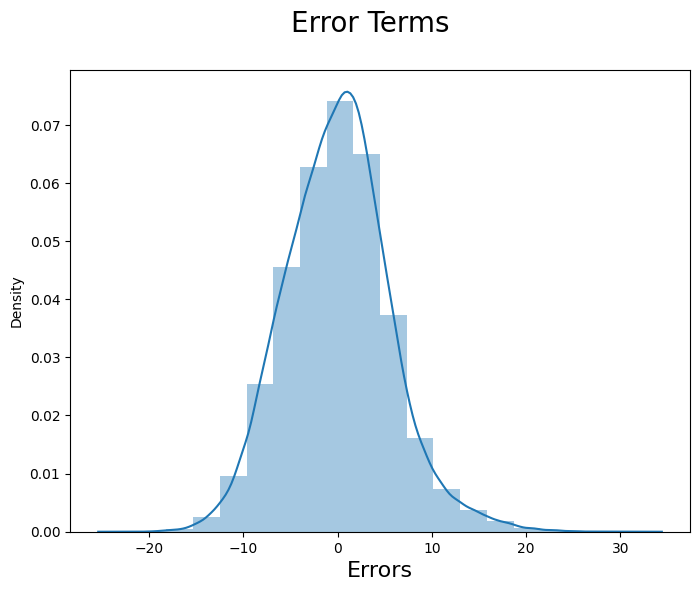

In [115]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

y_train_time = model.predict(X_train)

fig = plt.figure(figsize=(8,6))
sns.distplot((y_train - y_train_time), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=16)
plt.show()

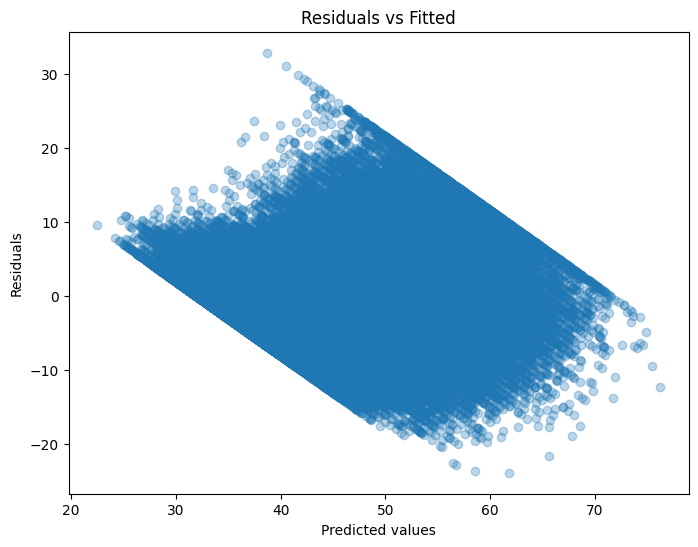

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(y_train_time, y_train - y_train_time, alpha=0.3)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

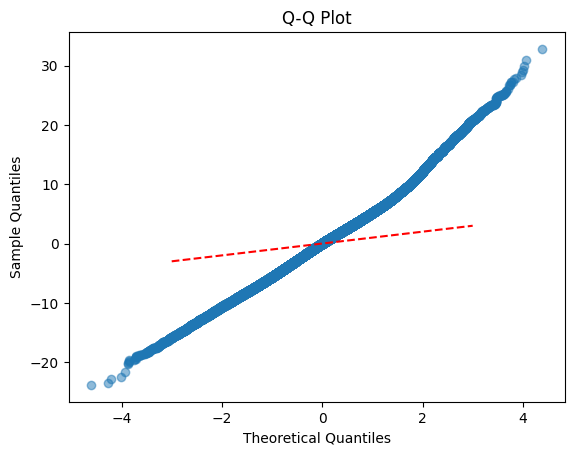

In [108]:

residuals = y_train - y_train_time
residuals_sorted = np.sort(residuals)
theoretical_quantiles = np.sort(np.random.normal(0, 1, len(residuals)))

plt.scatter(theoretical_quantiles, residuals_sorted, alpha=0.5)
plt.plot([-3, 3], [-3, 3], color='red', linestyle='--')
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [117]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score = r2_score(y_train, y_train_time)
mse = mean_squared_error(y_train, y_train_time)
print('r2_train: ', r2_score)
print('mse: ', mse)




r2_train:  0.6230032631292355
mse:  31.37734422021405


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


### Compare the scaled vs unscaled features used in the final model
For scaled continuous features:
	•	Coefficient means:
If the feature increases by 1 standard deviation, the delivery time changes by coef units (minutes).
So, e.g., if distance is scaled:
	•	Coefficient: ~22.58 → if distance increases by 1 std dev, time increases ~22.58 mins.

For unscaled dummy features:
	•	Coefficient means:
Compared to the reference group, delivery time changes by coef units (minutes).
E.g., market_id_2.0 = -8.5 means: being in market 2 reduces time by ~8.5 mins compared to the base market.

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [111]:
X_train['total_items'].std()

np.float64(0.2926081960219817)

### Analyze the effect of a unit change in a feature, say 'total_items'
Effect of 1 extra item= 2.0720/0.2926 = 7.08 minutes

A 1-unit increase in total_items (1 more item in an order) increases the expected delivery time by about 7.08 minutes,

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes, the dataset contains categorical variables.
The main categorical variables are:
	•	market_id
	•	order_protocol
	•	store_primary_category
	•	isWeekend (treated as binary categorical)
> Effect of categorical variables (based on final model):
    1️⃣ Variables with a positive effect (increase delivery time):
	•	isWeekend → Positive coefficient (~1.47)
            Deliveries take longer on weekends due to higher demand and possible traffic congestion.
	•	Some store_primary_category values (a few categories have positive coefficients):
            Example: store_primary_category_5 and store_primary_category_29
            These indicate stores in these categories add time to delivery, likely due to longer preparation or packaging time.
    2️⃣ Variables with a negative effect (reduce delivery time)
    	•	Market IDs:
        		market_id_2.0, market_id_3.0, market_id_4.0, market_id_5.0, market_id_6.0 → All negative coefficients
            	These markets have shorter average delivery times compared to the base market (market_id_1.0). Possible reasons: better logistics, closer restaurants, higher delivery fleet density.
    	•	Order Protocols:
            	order_protocol_2.0 to order_protocol_6.0 → mostly negative
            	Indicates certain order types (like pre-orders, priority delivery) help reduce delivery time.
    	•	Many store_primary_category dummy variables are negative:
            	For example, store_primary_category_6, store_primary_category_13, store_primary_category_20, store_primary_category_46, etc.
            	Stores in these categories tend to have faster average delivery times, likely due to faster food preparation, better kitchen efficiency, or simpler packaging.




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> Test_size = 0.2 means that 20% of the total dataset is set aside for testing, and the remaining 80% is used to train the model.

So, when splitting the data:
	•	80% → Training set (used to fit the model)
	•	20% → Test set (used to evaluate how well the model performs on unseen data)



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> From the correlation heatmap, the feature with the highest correlation (0.46) with the target variable (time_taken) is distance.
	•	Distance shows a strong positive correlation with time_taken.
	•	This means that as distance increases, the delivery time also increases.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Detection of Outliers:
To detect outliers in the dataset, I used the following approaches:
	•	Boxplots: I plotted boxplots for the numerical variables (distance, subtotal, time_taken) to visually identify extreme values.
	•	For each key numerical variable like distance, subtotal, and time_taken, I calculated Q1 (25th percentile) and Q3 (75th percentile).
	•	The IQR was computed as IQR = Q3 - Q1.
	•	Any data point lying below Q1 - 1.5×IQR or above Q3 + 1.5×IQR was considered a potential outlier.
Handling of Outliers:
Instead of removing them, I capped the outlier values:
	•	Values below the lower bound were replaced with the lower bound (Q1 - 1.5×IQR).
	•	Values above the upper bound were capped at the upper bound (Q3 + 1.5×IQR).




---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the final model’s coefficients and their statistical significance, the top 3 features that most strongly affect the delivery time are:
>1️⃣ distance (Strongest Positive Impact)
	•	Coefficient: ~22.58
	•	Effect: For each additional kilometer (or unit of distance), the delivery time increases significantly. This makes sense because the farther the delivery, the longer it takes.
>2️⃣ total_outstanding_orders (Positive Impact)
	•	Coefficient: ~15.35
	•	Effect: For every additional outstanding order a delivery person is handling, the delivery time increases. This indicates that higher workload leads to delays.
>3️⃣ subtotal (Positive Impact)
	•	Coefficient: ~9.30
	•	Effect: A higher order subtotal usually means a larger or more complex order, which takes more time to prepare and deliver.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression is one of the most widely used supervised machine learning algorithms for predictive modeling. It helps to establish a relationship between a dependent variable (target) and one or more independent variables (features) using a straight line.
>Key Concepts:
>1️⃣ Goal:
>Linear regression tries to find the best-fit line that minimizes the difference between the actual values and the predicted values of the target variable.
>The general form of a multiple linear regression equation is:
Y = β₀ + β₁ * X₁ + β₂ * X₂ + … + βₚ * Xₚ
>	Y: Dependent variable (target)
	X₁, X₂, …, Xₚ: Independent variables (features)
	β₀: Intercept (value of Y when all Xs are zero)
	β₁, β₂, …, βₚ: Coefficients for each feature (slope)
2️⃣ How It Works:
	•	The algorithm estimates the coefficients (β₀, β₁, ..., βₚ) by minimizing the Residual Sum of Squares (RSS), i.e., the sum of squared differences between actual and predicted values.
	•	This is done using the Ordinary Least Squares (OLS) method.
3️⃣ Assumptions:
For linear regression to perform well, certain assumptions should hold:
	•	Linearity: The relationship between independent and dependent variables is linear.
	•	Homoscedasticity: Constant variance of errors.
	•	No multicollinearity: Independent variables are not highly correlated with each other.
	•	Normality of errors: Residuals are normally distributed.
4️⃣ Prediction:
Once the model learns the coefficients, it can predict the target for new data by plugging the features into the equation.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>The key difference between Simple Linear Regression and Multiple Linear Regression lies in the number of independent variables used to predict the dependent variable.
>1️⃣ Simple Linear Regression
	•	Uses only one independent variable to predict the dependent variable.
>Equation:
Y = β₀ + β₁ * X + 
	•	Y: Dependent variable (target)
	•	X: Single independent variable
	•	β₀: Intercept
	•	β₁: Slope (coefficient for X)
	•	Example: Predicting delivery time based only on distance.
>2️⃣ Multiple Linear Regression
	•	Uses two or more independent variables to predict the dependent variable.
>Equation:
Y = β₀ + β₁ * X₁ + β₂ * X₂ + … +  βₚ * Xₚ 
	•	X₁, X₂, ..., Xₚ: Multiple independent variables.
	•	Example: Predicting delivery time using distance, total_items, order_hour, and market_id together.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>In linear regression, the cost function measures how well the model’s predicted values match the actual data.
The most common cost function is the Mean Squared Error (MSE):
Role of the Cost Function
	•	It quantifies the error between predicted and true values.
	•	It tells us how “bad” or “good” the model is.
	•	The goal of training is to minimize this error — i.e., to find the best-fitting line.
>
>How is it Minimized?
	•	Optimization Algorithm:
Linear Regression uses Gradient Descent (most common).
	•	Gradient Descent:
        	Starts with random coefficients.
    		Computes the gradient (slope) of the cost function w.r.t. each coefficient.
    		Updates coefficients in the direction that reduces the cost.
    		Repeats this until the cost function reaches a minimum.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting happens when a model fits the training data too well, capturing not only the underlying pattern but also the random fluctuations.
	•	As a result, the model performs very well on the training data but poorly on unseen (test) data, because it fails to generalize.
        Example: Using a high-degree polynomial line to fit a simple linear trend.
>Underfitting happens when a model is too simple to capture the underlying trend in the data.
	•	The model cannot capture the relationship well even in training data.
	•	It leads to high training error and high test error.
        Example: Using a straight line to fit a clear quadratic curve.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residuals are the differences between the actual values and the predicted values by the regression model:
Residual = y_actual - y_predicted
Analyzing residual plots is a key step in validating if your linear regression model assumptions hold true.
>1️⃣ Detect Non-Linearity
	•	In simple linear regression, we assume a linear relationship between predictors and the target.
	•	If residuals randomly scatter around zero in a horizontal band, it suggests linearity holds.
> 2️⃣ Check for Homoscedasticity
	•	Linear regression assumes constant variance of residuals.
	•	A residual plot with even spread across all predicted values indicates this.
> 3️⃣ Identify Outliers
	•	Residual plots help spot extreme points with very large residuals.
	•	Outliers can heavily influence the regression line and distort results.